<a href="https://colab.research.google.com/github/JackiApligian/UnSupervised--Stocks/blob/main/Apligian_Final_Project_USL_Project_LearnerNotebook_FullCode%2B_282_29.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share 
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
# Importing all needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#mount Google Drive
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Loading the dataset from drive
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/stock_data.csv') 


## Data Overview

- Observations
- Sanity checks

In [ ]:
#Checking the first few rows of the data set
df.head()

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

In [ ]:
#Checking the last few rows of the data set
df.tail()


Ticker Symbol                Security             GICS Sector  \
335          YHOO              Yahoo Inc.  Information Technology   
336           YUM         Yum! Brands Inc  Consumer Discretionary   
337           ZBH  Zimmer Biomet Holdings             Health Care   
338          ZION           Zions Bancorp              Financials   
339           ZTS                  Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
335  Internet Software & Services      33.259998     14.887727    1.845149   
336                   Restaurants      52.516175     -8.698917    1.478877   
337         Health Care Equipment     102.589996      9.347683    1.404206   
338                Regional Banks      27.299999     -1.158588    1.468176   
339               Pharmaceuticals      47.919998     16.678836    1.610285   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
335   15         459    -1032187000 -4359082000               -4.64   
336  142          27      159000000  1293000000                2.97   
337    1         100      376000000   147000000                0.78   
338    4          99      -43623000   309471000                1.20   
339   32          65      272000000   339000000                0.68   

     Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
335                   939457327.6   28.976191   6.261775  
336                   435353535.4   17.682214  -3.838260  
337                   188461538.5  131.525636 -23.884449  
338                   257892500.0   22.749999  -0.063096  
339                   498529411.8   70.470585   1.723068

In [ ]:
#Cheking the shape of the data set
df.shape

(340, 15)

**There are 340 rows and 15 columns in this data set**

In [ ]:
#Creating a copy of the original data set before manipulation
data=df.copy()

In [ ]:
#Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

**All data types are as expected for the input.**

In [ ]:
#Checking for missing values
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

**There are no missing values in this data set**

In [ ]:
#Checking for duplicated values
df.duplicated().sum()

0

**There are no duplicated values**

In [ ]:
#Statistical characterists fo the numerical variablesxz
df.describe(include='all').T


count unique  \
Ticker Symbol                   340    340   
Security                        340    340   
GICS Sector                     340     11   
GICS Sub Industry               340    104   
Current Price                 340.0    NaN   
Price Change                  340.0    NaN   
Volatility                    340.0    NaN   
ROE                           340.0    NaN   
Cash Ratio                    340.0    NaN   
Net Cash Flow                 340.0    NaN   
Net Income                    340.0    NaN   
Earnings Per Share            340.0    NaN   
Estimated Shares Outstanding  340.0    NaN   
P/E Ratio                     340.0    NaN   
P/B Ratio                     340.0    NaN   

                                                             top freq  \
Ticker Symbol                                                AAL    1   
Security                                 American Airlines Group    1   
GICS Sector                                          Industrials   53   
GICS Sub Industry             Oil & Gas Exploration & Production   16   
Current Price                                                NaN  NaN   
Price Change                                                 NaN  NaN   
Volatility                                                   NaN  NaN   
ROE                                                          NaN  NaN   
Cash Ratio                                                   NaN  NaN   
Net Cash Flow                                                NaN  NaN   
Net Income                                                   NaN  NaN   
Earnings Per Share                                           NaN  NaN   
Estimated Shares Outstanding                                 NaN  NaN   
P/E Ratio                                                    NaN  NaN   
P/B Ratio                                                    NaN  NaN   

                                           mean                std  \
Ticker Symbol                               NaN                NaN   
Security                                    NaN                NaN   
GICS Sector                                 NaN                NaN   
GICS Sub Industry                           NaN                NaN   
Current Price                         80.862345          98.055086   
Price Change                           4.078194          12.006338   
Volatility                             1.525976           0.591798   
ROE                                   39.597059          96.547538   
Cash Ratio                            70.023529          90.421331   
Net Cash Flow                   55537620.588235  1946365312.175789   
Net Income                    1494384602.941176  3940150279.327936   
Earnings Per Share                     2.776662           6.587779   
Estimated Shares Outstanding    577028337.75403   845849595.417695   
P/E Ratio                             32.612563          44.348731   
P/B Ratio                             -1.718249          13.966912   

                                        min          25%          50%  \
Ticker Symbol                           NaN          NaN          NaN   
Security                                NaN          NaN          NaN   
GICS Sector                             NaN          NaN          NaN   
GICS Sub Industry                       NaN          NaN          NaN   
Current Price                           4.5       38.555       59.705   
Price Change                     -47.129693    -0.939484     4.819505   
Volatility                         0.733163     1.134878     1.385593   
ROE                                     1.0         9.75         15.0   
Cash Ratio                              0.0         18.0         47.0   
Net Cash Flow                -11208000000.0 -193906500.0    2098000.0   
Net Income                   -23528000000.0  352301250.0  707336000.0   
Earnings Per Share                    -61.2       1.5575        2.895   
Estimated Shares Outstanding    27672156.86  158848216

**All 340 rows are unique stocks that are a part of 11 different business sectors. There are 104 sub industries from those 11 sectors.  The average stock current stock price for the data set is 80.86 with a average price change of 4.08. We will look at the other differences in stock values and company holdings while doing EDA.**

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of stock prices look like?
2. The stocks of which economic sector have seen the maximum price increase on average?
3. How are the different variables correlated with each other?
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

In [ ]:
# function to plot a boxplot and a histogram along the same scale.

def histogram_boxplot(df, feature, figsize=(12, 7), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

## **Univariate Analysis**

## **What does the distribution of stock prices look like?**

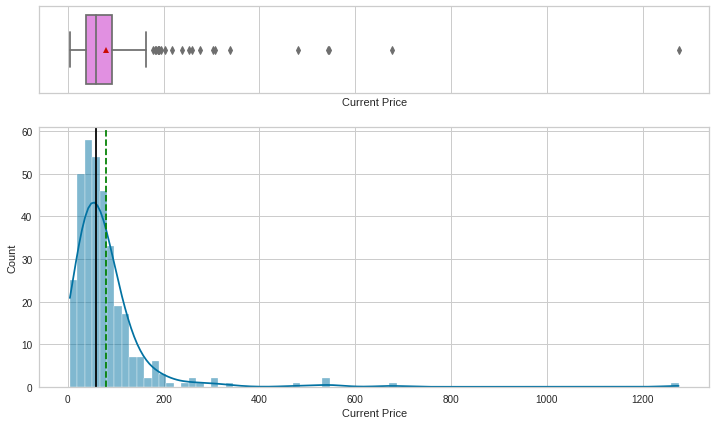

In [ ]:
#Visualizing current price of stocks to answer

histogram_boxplot(df, 'Current Price')

**The distribution of the stock prices follows a normal distribution pattern that is heavily skewed to the right. The majority of stocks are priced around 100 but are mostly under 200. The outliers extend to 1100.**

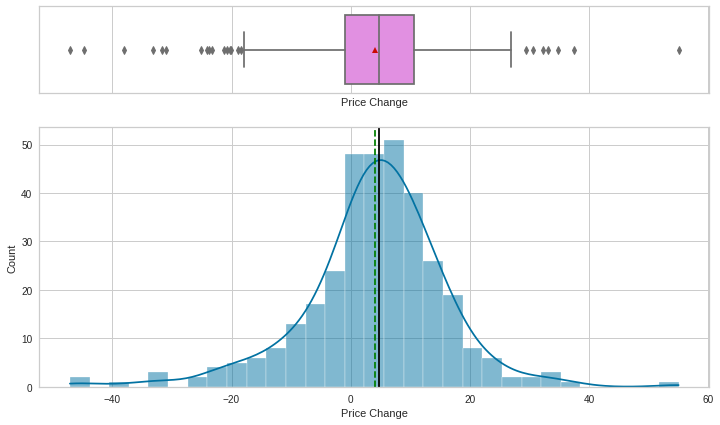

In [ ]:
#Visualizing the price change of the stocks
histogram_boxplot(df,'Price Change')

**Price change of stocks has a normal distribution with the average price change being less than 10. The ouliers extend right and left ranging from around -45 to 55.**

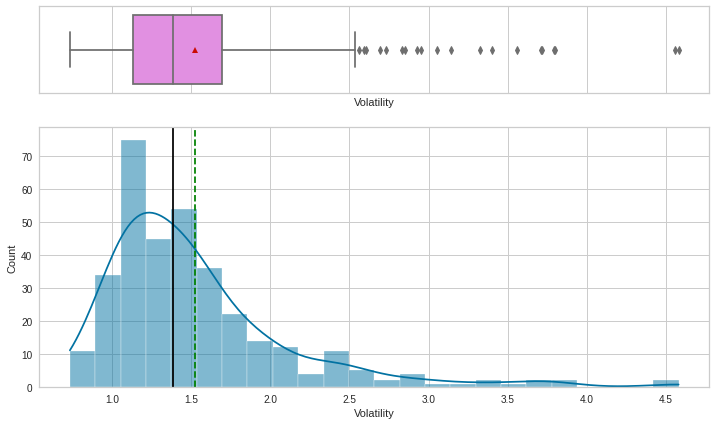

In [ ]:
#Visualizing the volatility of the stocks
histogram_boxplot(df,'Volatility')

**Volatility follows a right skewed distribution with the average around 15 and the mode around 12. The outliers for this variable extend to around 45 at the highest.**

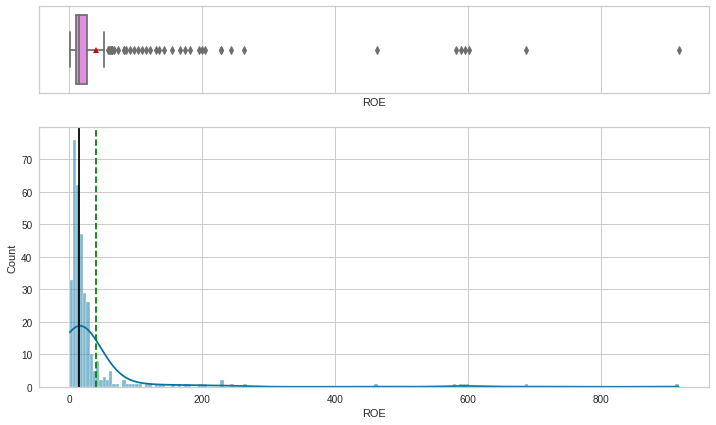

In [ ]:
#Visualizing the ROE of the stocks
histogram_boxplot(df,'ROE')

**The ROE is heavily skewed right and condensed the the average ROE less than 50. There are quite a few outliers with the highest over 900.**

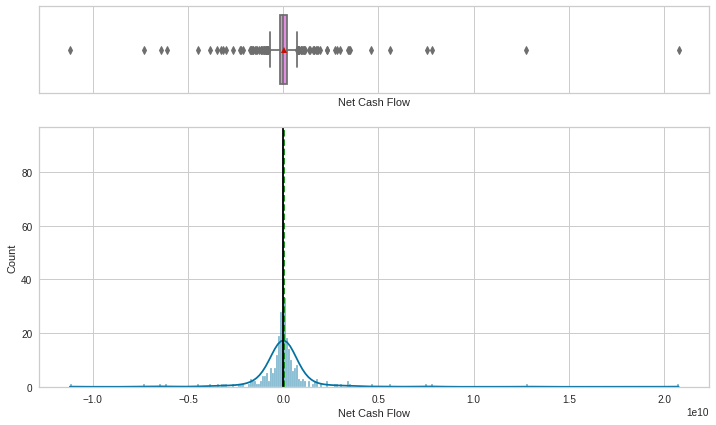

In [ ]:
#Visualizing the Net Cash Flow of the stocks
histogram_boxplot(df,'Net Cash Flow')

**Normal distribution with the mean and median at 0. There are extreme outliers on the higher end of the data set and a lesser amount on the lower end. The highest outlier goes to over 2.0.**

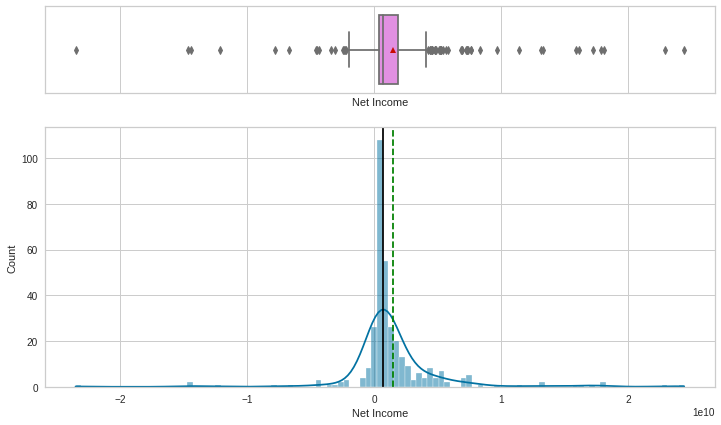

In [ ]:
#Visualizing the Net Income of the stocks
histogram_boxplot(df,'Net Income')

**Net Income follows a normal distribution pattern with the median and mode a little over 0.**

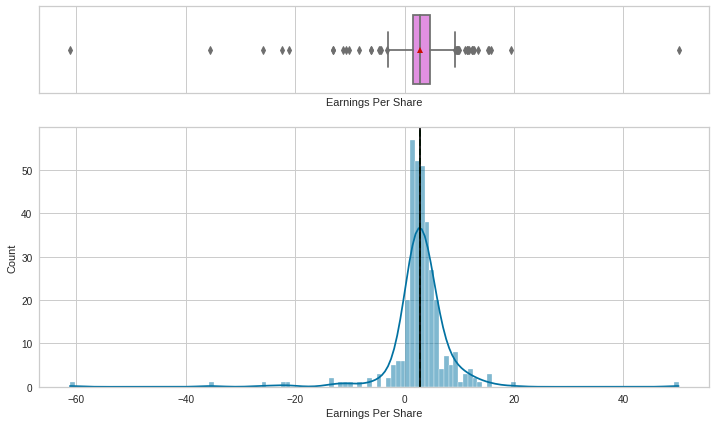

In [ ]:
#Visualizing Earnings Per Share
histogram_boxplot(df,'Earnings Per Share')

**Normal distribution with median and mean around 5. Negative outliers out past -60 with positive outliers near 50.**

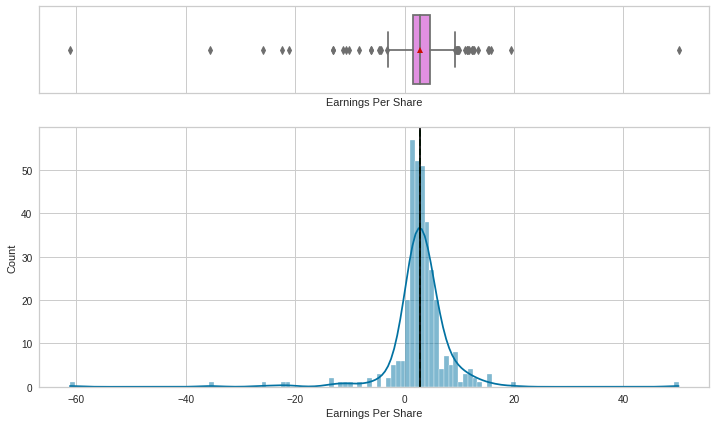

In [ ]:
#Visualizing Earnings Per Share
histogram_boxplot(df,'Earnings Per Share')


**Normalized distribution with median and mean near 5 with outliers ranging from -60 to near 50.**

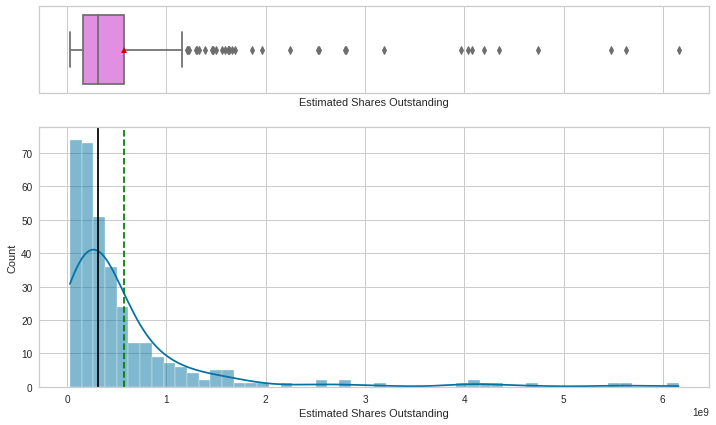

In [ ]:
#Visualizing Estimated Shares Outstanding
histogram_boxplot(df,'Estimated Shares Outstanding')

**Heavily skewed right distribution with median around 0.3 and mean around 0.5. Outliers extend to over 6.**

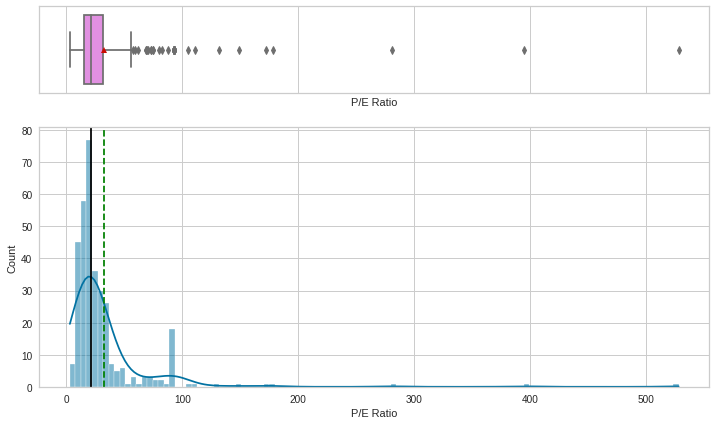

In [ ]:
#Visualizing P/E Ratio
histogram_boxplot(df,'P/E Ratio')

**Heavily skewed right distribution with outliers extending over 500.**

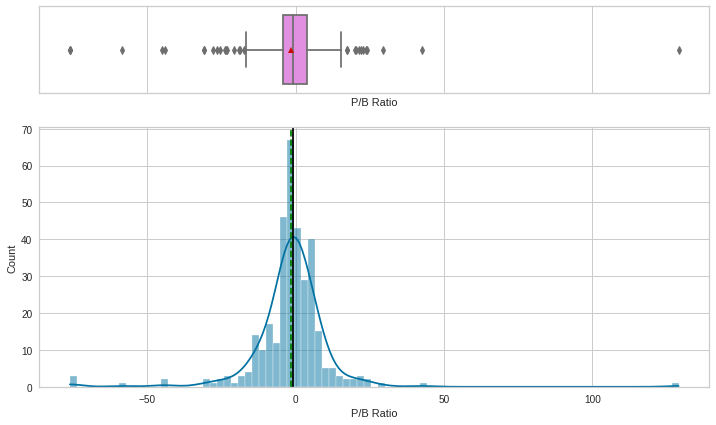

In [ ]:
#Visualizing P/B Ratio
histogram_boxplot(df,'P/B Ratio')

**Normal distribution with mean slightly less than 0. Outliers extend well past -50 and well over 100.**

In [ ]:
# function to create labeled barplots for catagorical variables


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

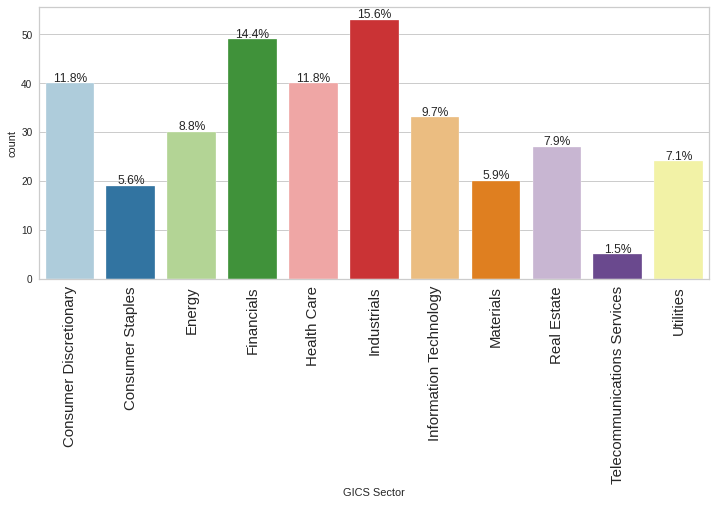

In [ ]:
#Comparing GICS Sectors
labeled_barplot(df, 'GICS Sector', perc=True)

**The Industrials sector has the most data points at 15.6% followed by Financials with 14.4%. Consumer Discretionary and Health Care are next at 11.8% for both.**

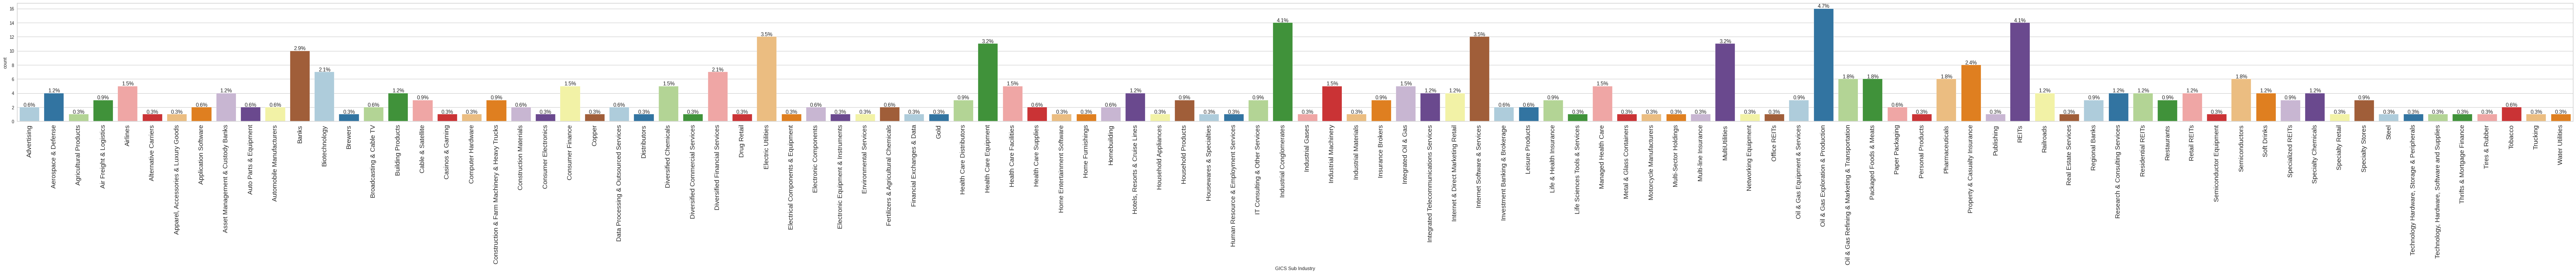

In [ ]:
#Comparing GICS Sub Industry
labeled_barplot(df, 'GICS Sub Industry', perc=True)

**There are 104 sub industries.  Oil and Gas Exploration and Production have the most entries at 4.7% followed by Industrial Conglomerates and REITs at 4.1%.  Electric Utilities and Internet Software and Services are at 3.5%, Multi Utilites and Health Care Equipment at 3.2% and all others are under 3% of the data set.**

## **Bivariate Analysis**

**Let's look at the relationships between variables.**


## **How are the different variables correlated with each other?**

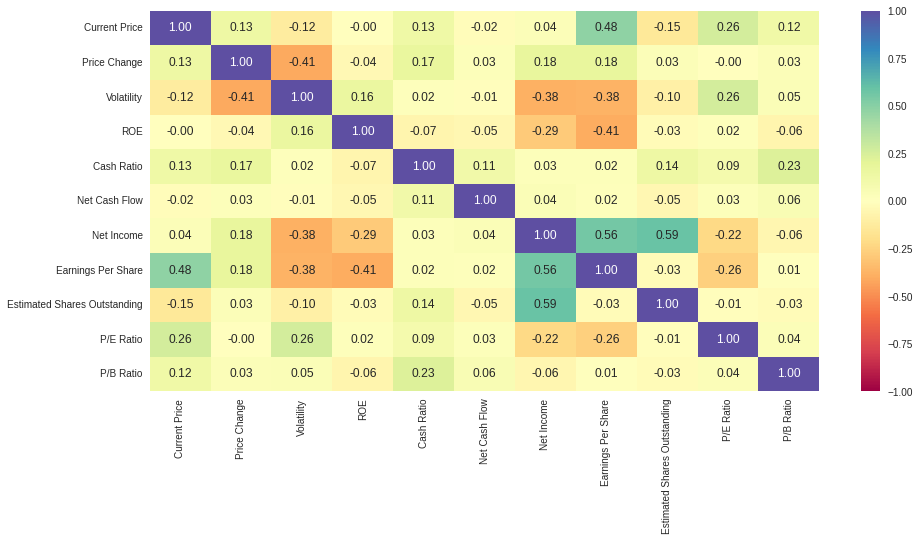

In [ ]:
#Let's look at the heatmap for coorelations in the data set
plt.figure(figsize=(15, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**The highest coorelations of variables seem to be Net Income and Estimated Shares Outstanding with 59% coorelated. This is followed by Net Income and Earnings Per Share at 56% coorelated. There is also coorelation between Earnings Per Share and Current Price at 48%. The Volatility and Price Change variables as well as Earnings Per Share and ROE variables show coorelation at 41%. There are other lesser coorelations in the data as well.**



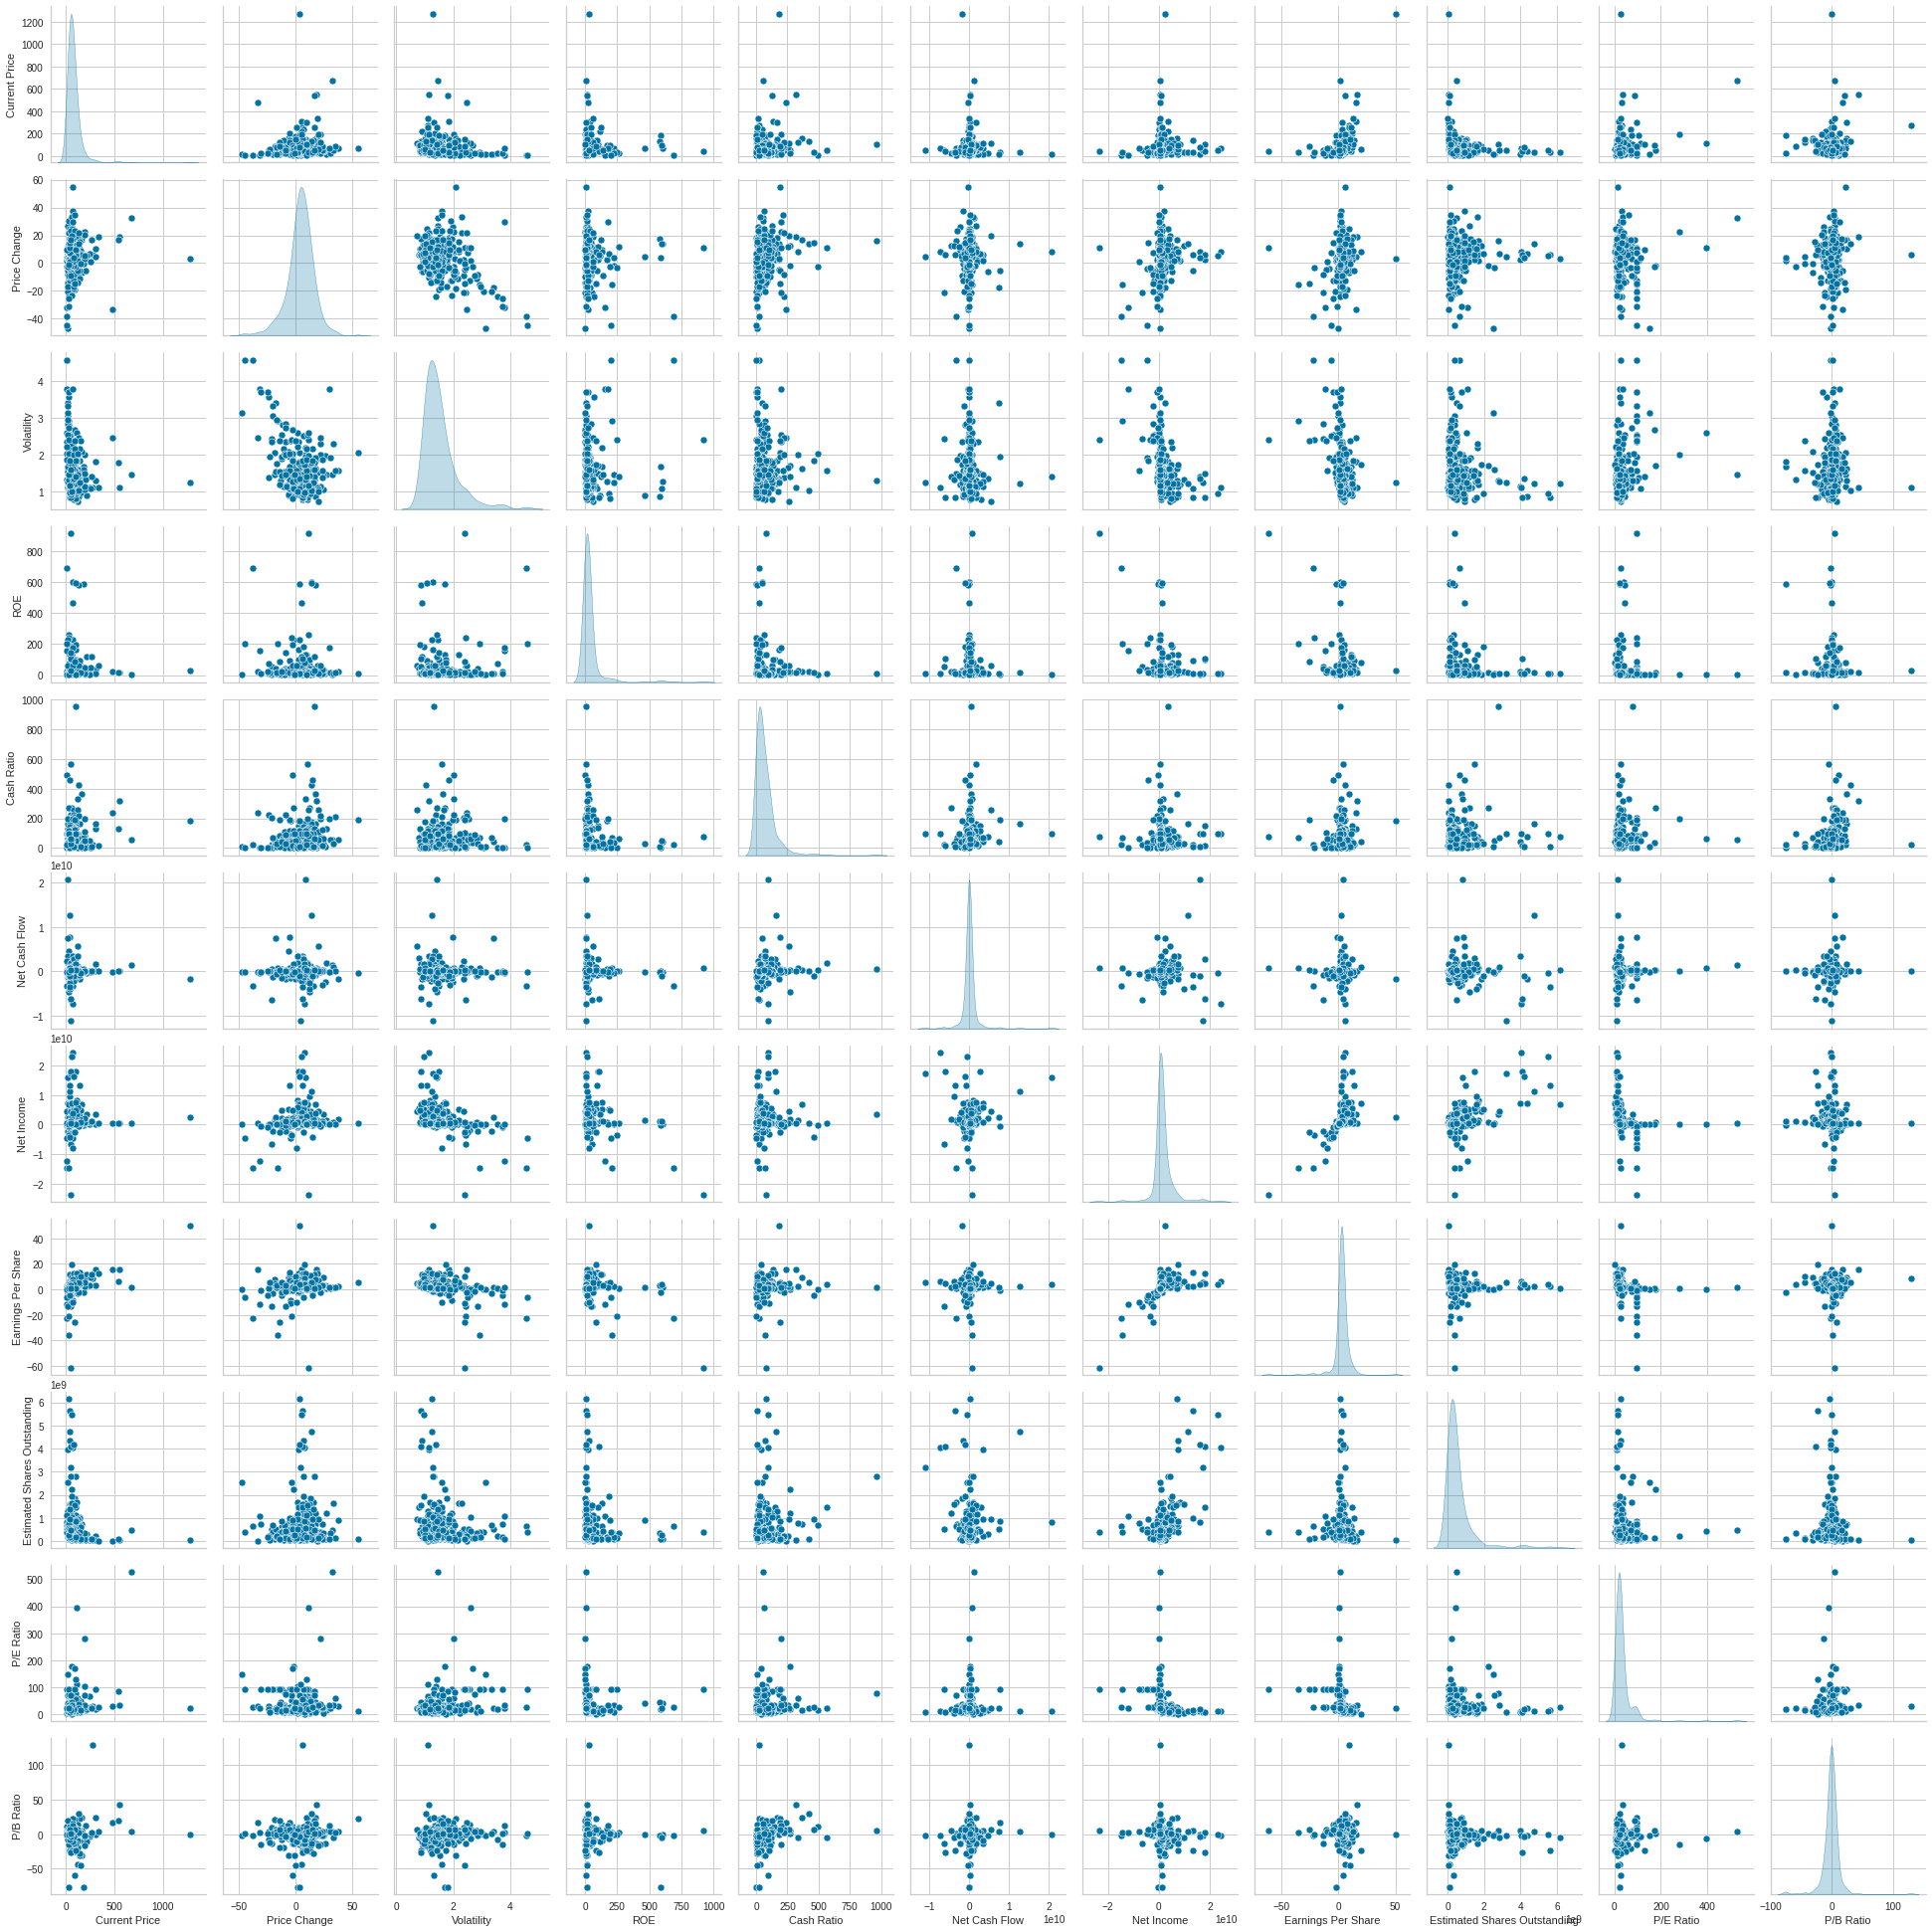

In [ ]:
#Pairplot to look for linear relationships across the variables
sns.pairplot(data=df, diag_kind="kde")
plt.show()

**Much of the data appears to be uncoorelated but there seems to be a positive relationship between Earnings Per Share and Net Income. Most of the data demonstrates only one to two peaks which will be interesting as we begin to cluster.**

## **The stocks of which economic sector have seen the maximum price increase on average?**

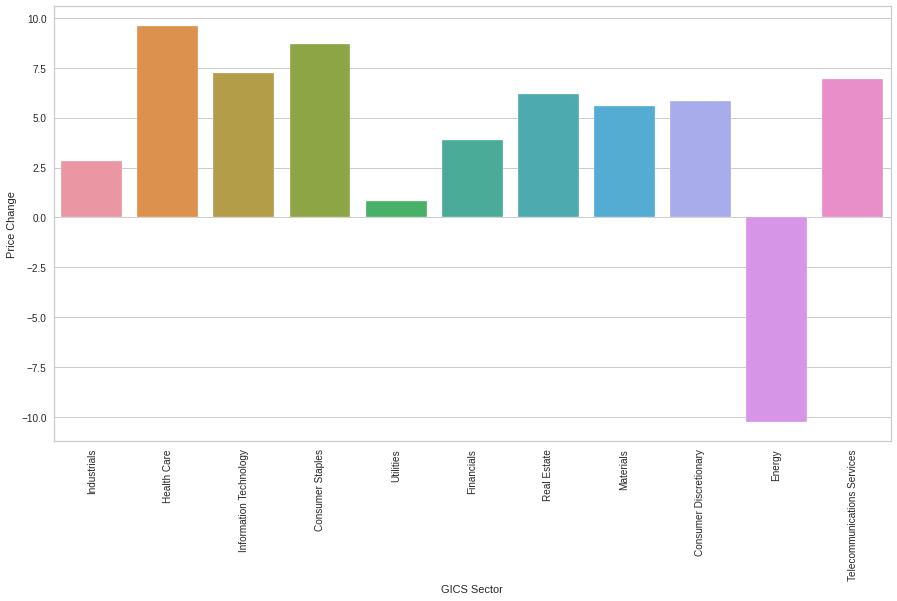

In [ ]:
#Visualize the price changes across economic sectors
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Price Change', ci=False)
plt.xticks(rotation=90)
plt.show()

**The Health Care sector has seen the maximum price increase followed by Consumer Staples then Information Technology. The Energy sector has seen the biggest drop in stock price.**

## **Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?**

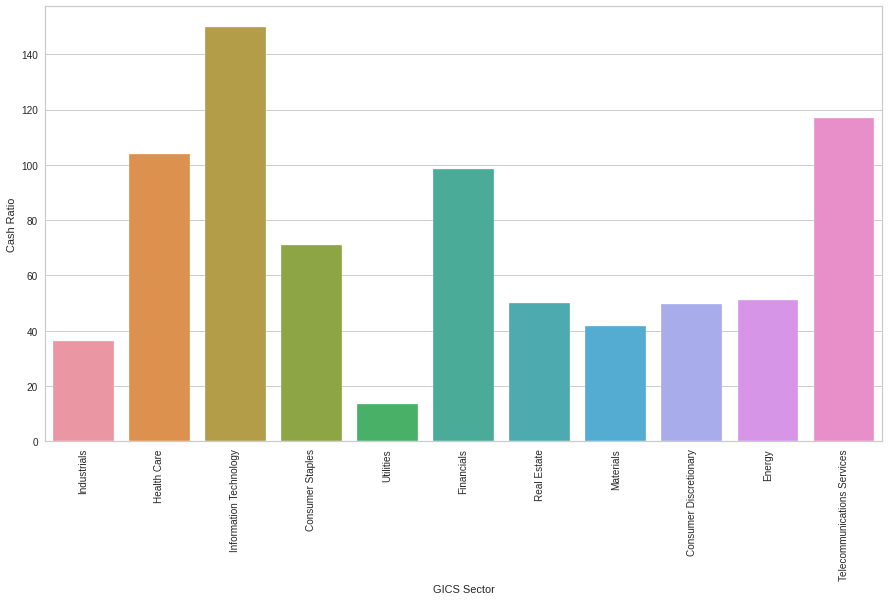

In [ ]:
#Visualize the cash ratio across economic sectors
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()


**The industry with the best cash ratio is the information technology sector followed by the telecommunications services, health care and finacials. The sector with the smallest cash ratio to back up their short term obligations is the Utilities sector.**

## **P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?**

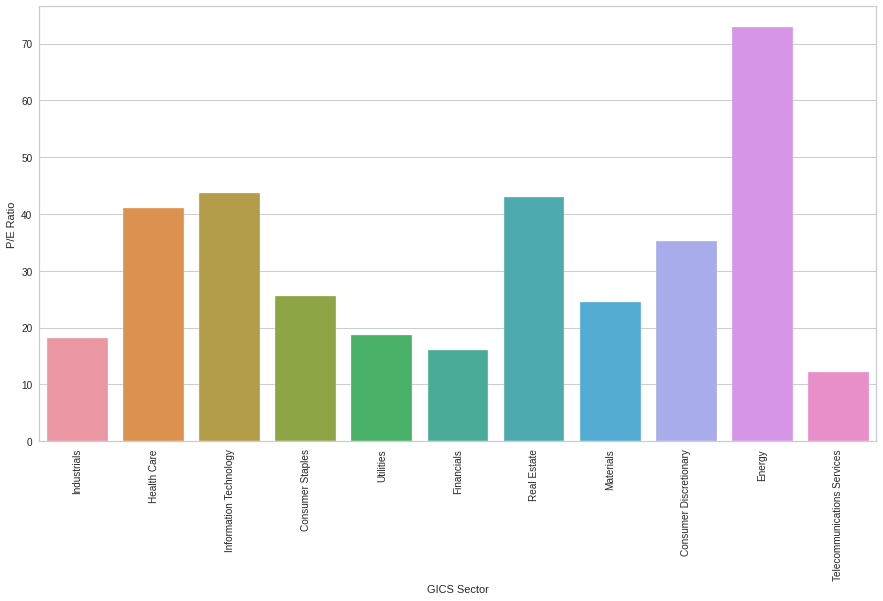

In [ ]:
#Visualize the P/E ratio across economic sectors
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()


**The energy sector has the largest P/E ratio of over 70. The next closest sectors are the Real Estate and Information Technology sectors followed closely by the Health Care sector.**

## **Volatility accounts for the fluctuation in the stock price. A stock with high volatility will witness sharper price changes, making it a riskier investment. How does volatility vary, on average, across economic sectors?**

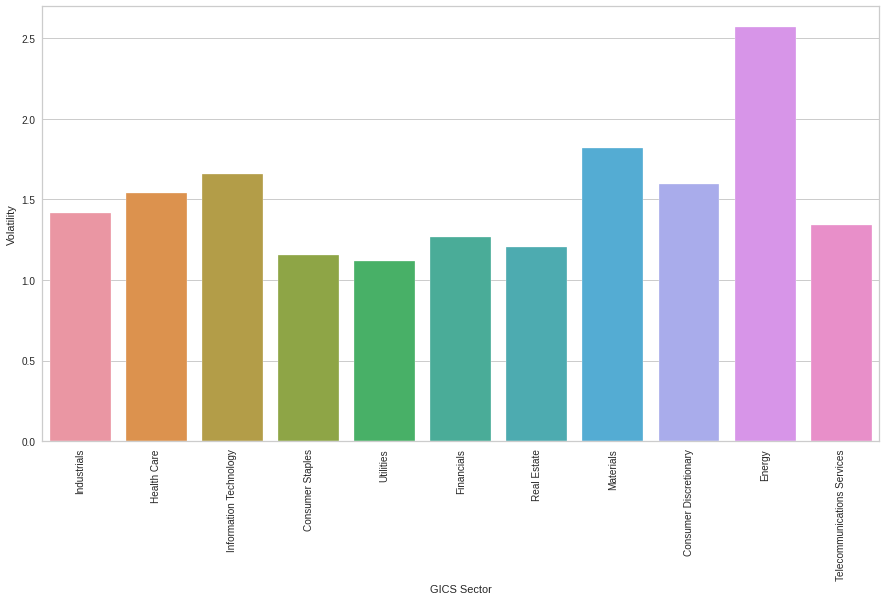

In [ ]:
#Visualize the volatility of stock prices across economic sectors
plt.figure(figsize=(15,8))
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)
plt.xticks(rotation=90)
plt.show()


**The Energy sector also has the highest amount of volatility as well. This is followed by Materials and Information Technology, Consumer Discretionary, Health Care and Industrials.**

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [ ]:
#Checking for duplicate values
df.duplicated().sum()

0

**As seen above, there are no duplicate values**

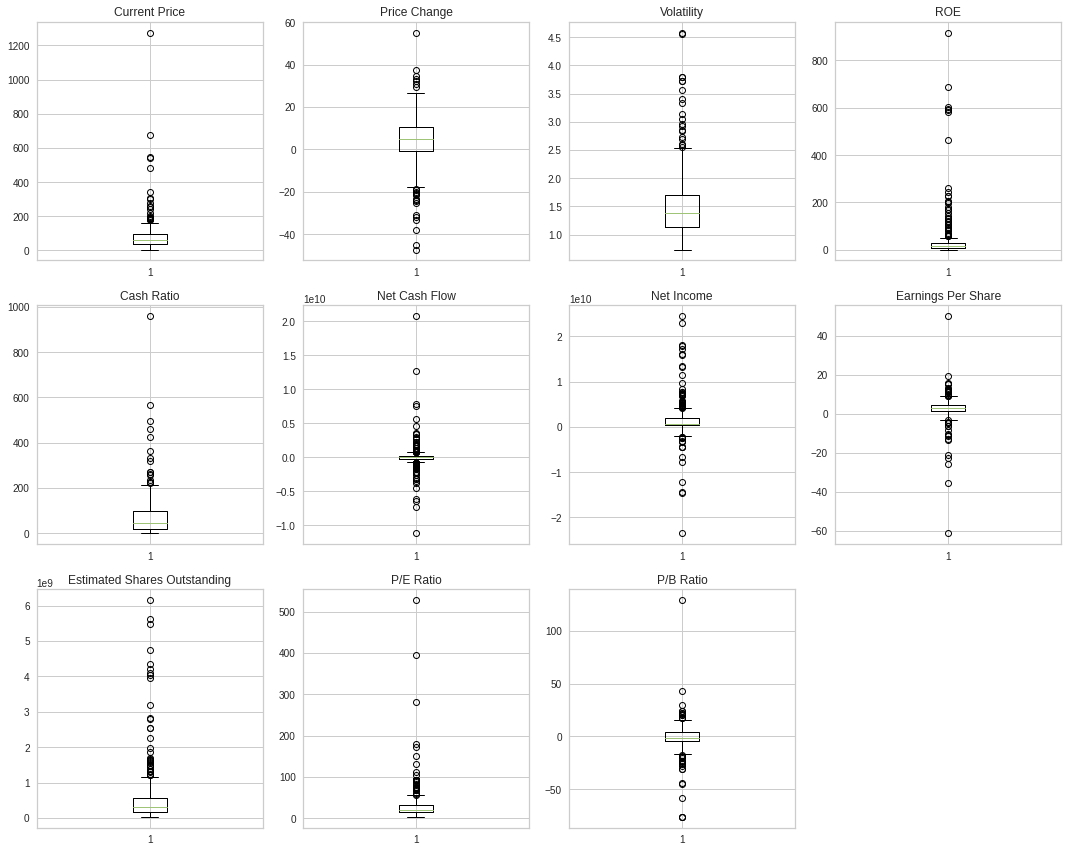

In [ ]:
#Analyzing outliers by plotting boxpots of all numerical values
plt.figure(figsize=(15, 12))

numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**There are multiple outliers across all of the variables. The biggest outlier is in the Current Price followed by Cash Ratio and ROE. Since K Means is so sensitive to outliers, I will adjust any amount over 800. The main outliers for this data are in the current price over 1200, ROE over 800 and Cash Ratio close to 1000.**

In [ ]:
#Creating a df with just numeric numbers for outlier manipulation
num_df=df[numeric_columns]

In [ ]:
num_df.head()

Current Price  Price Change  Volatility  ROE  Cash Ratio  Net Cash Flow  \
0      42.349998      9.999995    1.687151  135          51     -604000000   
1      59.240002      8.339433    2.197887  130          77       51000000   
2      44.910000     11.301121    1.273646   21          67      938000000   
3      93.940002     13.977195    1.357679    9         180     -240840000   
4      55.320000     -1.827858    1.701169   14         272      315120000   

   Net Income  Earnings Per Share  Estimated Shares Outstanding   P/E Ratio  \
0  7610000000               11.39                  6.681299e+08    3.718174   
1  5144000000                3.15                  1.633016e+09   18.806350   
2  4423000000                2.94                  1.504422e+09   15.275510   
3   629551000                1.26                  4.996437e+08   74.555557   
4   696878000                0.31                  2.247994e+09  178.451613   

   P/B Ratio  
0  -8.784219  
1  -8.750068  
2  -0.394171  
3   4.199651  
4   1.059810

In [ ]:
print('skewness value of Current Price: ',df['Current Price'].skew())
print('skewness value of Price Change: ',df['Price Change'].skew())
print('skewness value of Volatitlity: ',df['Volatility'].skew())
print('skewness value of ROE: ',df['ROE'].skew())
print('skewness value of Cash Ratio: ',df['Cash Ratio'].skew())
print('skewness value of Cash Flow: ',df['Net Cash Flow'].skew())
print('skewness value of Net Income: ',df['Net Income'].skew())
print('skewness value of Earnings Per Share: ',df['Earnings Per Share'].skew())
print('skewness value of Estimated Shares Outstanding: ',df['Estimated Shares Outstanding'].skew())
print('skewness value of P/E Ratio: ',df['P/E Ratio'].skew())
print('skewness value of P/B Ratio: ',df['P/B Ratio'].skew())

skewness value of Current Price:  7.047314473571039
skewness value of Price Change:  -0.5591568036040258
skewness value of Volatitlity:  2.097423793360458
skewness value of ROE:  5.773421575650542
skewness value of Cash Ratio:  4.467453231951163
skewness value of Cash Flow:  3.847724818293334
skewness value of Net Income:  0.9454167510148961
skewness value of Earnings Per Share:  -2.7215843164816045
skewness value of Estimated Shares Outstanding:  3.8453087830367148
skewness value of P/E Ratio:  6.709130606112658
skewness value of P/B Ratio:  0.8164232388276682


**There are 8 out of the 10 variables that are highly skewed. In order to maintain the information that these variables provide, I will cap their outliers at the max number rather than remove them. The columns needing adjustment are Current Price, Volatility, ROE, Cash Ratio, Cash Flow, Earnings Per Share, Estimated Shares Outstanding, and P/E Ratio.**

In [ ]:
 #Identifying the outliers for Current Price
lower_limit = df['Current Price'].quantile(.01)
upper_limit = df["Current Price"].quantile(0.99)

print(lower_limit)
print(upper_limit)

7.2226345728300005
518.2921992900009


In [ ]:
#Identifying the upper outliers for Current Price
df[df['Current Price'] > upper_limit]

Ticker Symbol                 Security             GICS Sector  \
26           AMZN           Amazon.com Inc  Consumer Discretionary   
171          ISRG  Intuitive Surgical Inc.             Health Care   
243          PCLN        Priceline.com Inc  Consumer Discretionary   
264          REGN                Regeneron             Health Care   

                      GICS Sub Industry  Current Price  Price Change  \
26   Internet & Direct Marketing Retail     675.890015     32.268105   
171               Health Care Equipment     546.159973     18.733013   
243  Internet & Direct Marketing Retail    1274.949951      3.190527   
264                       Biotechnology     542.869995     16.995320   

     Volatility  ROE  Cash Ratio  Net Cash Flow  Net Income  \
26     1.460386    4          58     1333000000   596000000   
171    1.126009   14         317      114300000   588800000   
243    1.268340   29         184    -1671386000  2551360000   
264    1.802345   17         129      160383000   636056000   

     Earnings Per Share  Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
26                 1.28                  4.656250e+08  528.039074   3.904430  
171               15.87                  3.710145e+07   34.414617  42.607500  
243               50.09                  5.093552e+07   25.453183  -1.052429  
264                6.17                  1.030885e+08   87.985412  20.409000

**Out of the 4 outliers over the 99% upper limit, the Current Price for Priceline at 1274.949951 is a huge leap up from any other inputs. We will change this input a max number of 700.**

<AxesSubplot:ylabel='Current Price'>

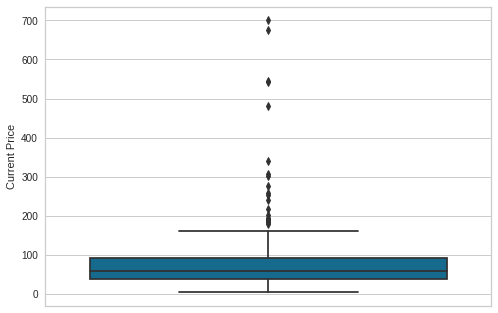

In [ ]:
#Setting the outliers to max number
upper_limit = 700

df["Current Price"] = np.where(df["Current Price"]> upper_limit, upper_limit,df["Current Price"])

sns.boxplot( y="Current Price", data=df)

**This corrected the data to account for the huge outlier in Current Price. There are other outliers but not as big as this one.**

In [ ]:
 #Identifying the outliers for Volatility
lower_limit = df['Volatility'].quantile(.01)
upper_limit = df["Volatility"].quantile(0.99)

print(lower_limit)
print(upper_limit)

0.83163912767
3.765446047550001


In [ ]:
#Identifying the upper outliers for Volatility
df[df['Volatility'] > upper_limit]


Ticker Symbol                   Security             GICS Sector  \
62            CHK          Chesapeake Energy                  Energy   
127           FCX  Freeport-McMoran Cp & Gld               Materials   
284           SWN        Southwestern Energy                  Energy   
327          WYNN           Wynn Resorts Ltd  Consumer Discretionary   

                      GICS Sub Industry  Current Price  Price Change  \
62                 Integrated Oil & Gas       4.500000    -38.101788   
127                              Copper       6.770000    -31.685167   
284  Oil & Gas Exploration & Production       7.110000    -44.798137   
327                    Casinos & Gaming      69.190002     29.496541   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
62     4.559815  687          22    -3283000000 -14685000000   
127    3.796410  155           5     -240000000 -12156000000   
284    4.580042  200           2      -38000000  -4556000000   
327    3.794783  174         198     -102075000    195290000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
62               -22.43                  6.547035e+08  28.407929  -1.840528  
127              -11.31                  1.074801e+09  22.811951   2.935427  
284               -6.07                  4.021417e+08  93.089287   1.273530  
327                1.93                  1.011865e+08  35.849742  12.695712

**The outliers here are not as extreme but are showing a right skewing of the data at over 2. Let's adjust them to the max number.** 

<AxesSubplot:ylabel='Volatility'>

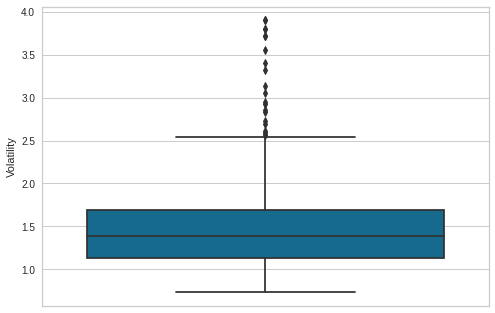

In [ ]:
#Setting the outliers to max number
upper_limit = 3.9

df["Volatility"] = np.where(df["Volatility"]> upper_limit, upper_limit,df["Volatility"])

sns.boxplot( y="Volatility", data=df)

In [ ]:
 #Identifying the outliers for ROE
lower_limit = df['ROE'].quantile(.01)
upper_limit = df["ROE"].quantile(0.99)

print(lower_limit)
print(upper_limit)

2.0
593.2700000000001


In [ ]:
#Identifying the upper outliers for ROE
df[df['ROE'] > upper_limit]

Ticker Symbol            Security  GICS Sector  \
18           ALLE            Allegion  Industrials   
30            APA  Apache Corporation       Energy   
62            CHK   Chesapeake Energy       Energy   
278          SPGI    S&P Global, Inc.   Financials   

                      GICS Sub Industry  Current Price  Price Change  \
18                    Building Products      65.919998     13.753230   
30   Oil & Gas Exploration & Production      44.470001     11.397804   
62                 Integrated Oil & Gas       4.500000    -38.101788   
278      Diversified Financial Services      98.580002     14.044424   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
18     1.283795  601          45      -90800000    153900000   
30     2.405408  917          80      698000000 -23528000000   
62     3.900000  687          22    -3283000000 -14685000000   
278    1.080858  596          51    -1016000000   1156000000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
18                 1.60                    96187500.0  41.199999  -0.877453  
30               -61.20                   384444444.4  93.089287   4.970809  
62               -22.43                   654703522.1  28.407929  -1.840528  
278                4.26                   271361502.3  23.140846  -4.178927

**There is one outlier well above all other inputs at 917. I will adjust this number to the max number.**

<AxesSubplot:ylabel='ROE'>

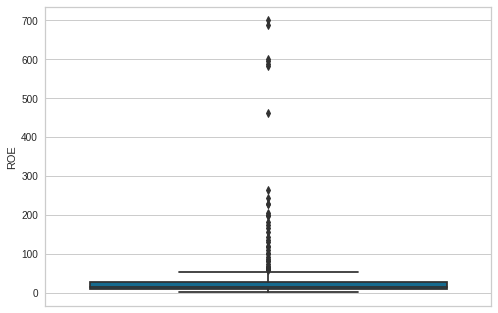

In [ ]:
#Setting the outliers to the max number of 700
upper_limit = 700

df["ROE"] = np.where(df["ROE"]> upper_limit, upper_limit,df["ROE"])

sns.boxplot( y="ROE", data=df)

In [ ]:
 #Identifying the outliers for Cash Ratio
lower_limit = df['Cash Ratio'].quantile(.01)
upper_limit = df["Cash Ratio"].quantile(0.99)

print(lower_limit)
print(upper_limit)

0.3900000000000001
445.74000000000046


In [ ]:
#Identifying the upper outliers for Cash Ratio
df[df['Cash Ratio'] > upper_limit]

Ticker Symbol                 Security                  GICS Sector  \
125            FB                 Facebook       Information Technology   
137           FTR  Frontier Communications  Telecommunications Services   
211          MNST         Monster Beverage             Consumer Staples   
335          YHOO               Yahoo Inc.       Information Technology   

                          GICS Sub Industry  Current Price  Price Change  \
125            Internet Software & Services     104.660004     16.224320   
137  Integrated Telecommunications Services       4.670000     -2.301255   
211                             Soft Drinks      49.653332     10.800357   
335            Internet Software & Services      33.259998     14.887727   

     Volatility  ROE  Cash Ratio  Net Cash Flow  Net Income  \
125    1.320606    8         958      592000000  3669000000   
137    2.026818    3         496      254000000  -196000000   
211    1.585944   11         568     1805094000   546733000   
335    1.845149   15         459    -1032187000 -4359082000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
125                1.31                  2.800763e+09  79.893133   5.884467  
137               -0.29                  6.758621e+08  14.518987  10.497704  
211                3.71                  1.469542e+09  25.420118  -5.190734  
335               -4.64                  9.394573e+08  28.976191   6.261775

**Again, there is one outlier that is much higher than the others. I will replace it with the max number.**

<AxesSubplot:ylabel='Cash Ratio'>

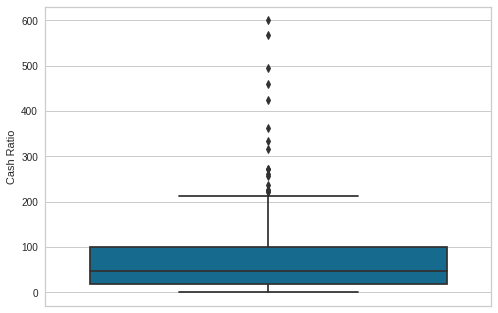

In [ ]:
#Setting the outliers to the max number of 600
upper_limit = 600

df["Cash Ratio"] = np.where(df["Cash Ratio"]> upper_limit, upper_limit,df["Cash Ratio"])

sns.boxplot( y="Cash Ratio", data=df)

In [ ]:
 #Identifying the outliers for Net Cash Flow
lower_limit = df['Net Cash Flow'].quantile(.01)
upper_limit = df["Net Cash Flow"].quantile(0.99)

print(lower_limit)
print(upper_limit)

-5491520000.0
6775994000.000026


In [ ]:
#Identifying the upper outliers for Net Cash Flow
df[df['Net Cash Flow'] > upper_limit]

Ticker Symbol                    Security             GICS Sector  \
40            BAC        Bank of America Corp              Financials   
147           HAL             Halliburton Co.                  Energy   
157           HPE  Hewlett Packard Enterprise  Information Technology   
167          INTC                 Intel Corp.  Information Technology   

                              GICS Sub Industry  Current Price  Price Change  \
40                                        Banks      16.830000      8.440722   
147              Oil & Gas Equipment & Services      34.040001     -5.101751   
157  Technology Hardware, Storage & Peripherals      15.200000    -17.837838   
167                              Semiconductors      34.450001     14.035095   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
40     1.418688    6          99    20764000000  15888000000   
147    1.966062    4         189     7786000000   -671000000   
157    3.400491    7          45     7523000000   2461000000   
167    1.226022   19         162    12747000000  11420000000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
40                 4.18                  8.450695e+08  13.004785  -0.938007  
147               -0.79                  8.493671e+08  93.089287  17.345857  
157                1.80                  5.139877e+08  25.309524   3.954975  
167                2.41                  4.738589e+09  14.294606   3.954975

**There are 2 outliers that much higher than the rest of the inputs. We will set max number to 8000000000.**

In [ ]:
#Identifying the lower outliers for Net Cash Flow
df[df['Net Cash Flow'] < lower_limit]

Ticker Symbol                 Security                  GICS Sector  \
31            APC  Anadarko Petroleum Corp                       Energy   
52              C           Citigroup Inc.                   Financials   
177           JPM     JPMorgan Chase & Co.                   Financials   
317            VZ   Verizon Communications  Telecommunications Services   

                          GICS Sub Industry  Current Price  Price Change  \
31       Oil & Gas Exploration & Production      48.580002    -20.802083   
52                                    Banks      51.750000      4.714695   
177                                   Banks      66.029999      8.033377   
317  Integrated Telecommunications Services      46.220001      6.277303   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
31     2.435165   52          22    -6430000000  -6692000000   
52     1.261984    8          99   -11208000000  17242000000   
177    1.130337   10          99    -7341000000  24442000000   
317    0.842592  109          14    -6128000000  17879000000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
31               -13.18                  5.077390e+08  93.089287 -12.860938  
52                 5.41                  3.187061e+09   9.565619  -1.167533  
177                6.05                  4.040000e+09  10.914049  -1.886881  
317                4.38                  4.081963e+09  10.552512 -26.380687

**There is one negative outlier for this variable as well. We will change this to the minimum number.**

<AxesSubplot:ylabel='Net Cash Flow'>

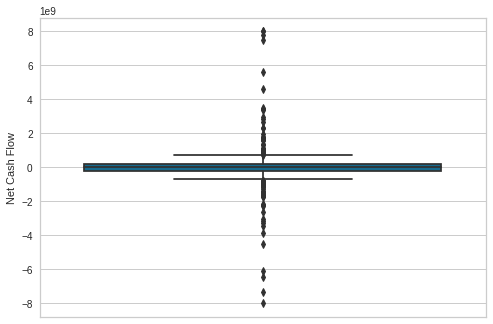

In [ ]:
#Setting the outliers for Net Cash Flow
upper_limit = 8000000000
lower_limit = -8000000000

df["Net Cash Flow"] = np.where(df["Net Cash Flow"]> upper_limit, upper_limit,df["Net Cash Flow"])

df['Net Cash Flow'] = np.where(df['Net Cash Flow']< lower_limit, lower_limit,df['Net Cash Flow'])
sns.boxplot( y="Net Cash Flow", data=df)

In [ ]:
 #Identifying the outliers for Earnings Per Share
lower_limit = df['Earnings Per Share'].quantile(.01)
upper_limit = df["Earnings Per Share"].quantile(0.99)

print(lower_limit)
print(upper_limit)

-21.9425
15.348800000000002


In [ ]:
#Identifying the upper outliers for Earnings Per Share
df[df['Earnings Per Share'] > upper_limit]

Ticker Symbol                     Security             GICS Sector  \
45           BIIB             BIOGEN IDEC Inc.             Health Care   
171          ISRG      Intuitive Surgical Inc.             Health Care   
243          PCLN            Priceline.com Inc  Consumer Discretionary   
301           UAL  United Continental Holdings             Industrials   

                      GICS Sub Industry  Current Price  Price Change  \
45                        Biotechnology     306.350006      4.917982   
171               Health Care Equipment     546.159973     18.733013   
243  Internet & Direct Marketing Retail     700.000000      3.190527   
301                            Airlines      57.299999      8.215294   

     Volatility  ROE  Cash Ratio  Net Cash Flow  Net Income  \
45     1.825994   38         133      148900000  3547000000   
171    1.126009   14         317      114300000   588800000   
243    1.268340   29         184    -1671386000  2551360000   
301    1.747606   82          42     1004000000  7340000000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
45                15.38                  2.306242e+08  19.918726   0.162602  
171               15.87                  3.710145e+07  34.414617  42.607500  
243               50.09                  5.093552e+07  25.453183  -1.052429  
301               19.52                  3.760246e+08   2.935451 -23.195292

**There is one major upper outlier that will need to be adjusted.**

In [ ]:
#Identifying the lower outliers for Earnings Per Share
df[df['Earnings Per Share'] < lower_limit]

Ticker Symbol            Security GICS Sector  \
30            APA  Apache Corporation      Energy   
62            CHK   Chesapeake Energy      Energy   
102           DVN  Devon Energy Corp.      Energy   
328           XEC      Cimarex Energy      Energy   

                      GICS Sub Industry  Current Price  Price Change  \
30   Oil & Gas Exploration & Production      44.470001     11.397804   
62                 Integrated Oil & Gas       4.500000    -38.101788   
102  Oil & Gas Exploration & Production      32.000000    -15.478079   
328  Oil & Gas Exploration & Production      89.379997    -14.403372   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
30     2.405408  700          80      698000000 -23528000000   
62     3.900000  687          22    -3283000000 -14685000000   
102    2.923698  205          70      830000000 -14454000000   
328    2.397940   86         190      373520000  -2408948000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
30               -61.20                  3.844444e+08  93.089287   4.970809  
62               -22.43                  6.547035e+08  28.407929  -1.840528  
102              -35.55                  4.065823e+08  93.089287   1.785616  
328              -25.92                  9.293781e+07  93.089287   7.186128

**There is one major lower outlier with an additional data point that is above the others as well. We will adjust both of these to 30.**

<AxesSubplot:ylabel='Earnings Per Share'>

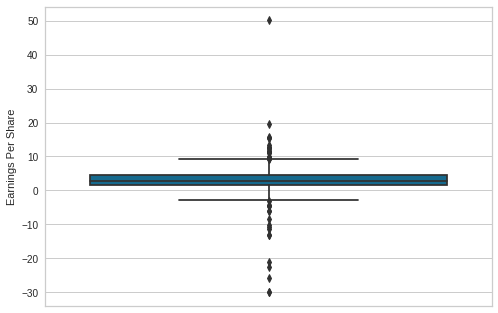

In [ ]:
#Setting the outliers for Earnings Per Share
upper_limit = 20
lower_limit = -30
df['Earnings Per Share'] = np.where(df['Earnings Per Share']< lower_limit, lower_limit,df['Earnings Per Share'])
sns.boxplot( y="Earnings Per Share", data=df)

In [ ]:
 #Identifying the outliers for Estimated Shares Outstanding
lower_limit = df['Estimated Shares Outstanding'].quantile(.01)
upper_limit = df["Estimated Shares Outstanding"].quantile(0.99)

print(lower_limit)
print(upper_limit)

42496735.3281
4586924034.700006


In [ ]:
#Identifying the upper outliers for Estimated Shares Outstanding
df[df['Estimated Shares Outstanding'] > upper_limit]

Ticker Symbol     Security                  GICS Sector  \
167          INTC  Intel Corp.       Information Technology   
246           PFE  Pfizer Inc.                  Health Care   
287             T     AT&T Inc  Telecommunications Services   
320           WFC  Wells Fargo                   Financials   

                          GICS Sub Industry  Current Price  Price Change  \
167                          Semiconductors      34.450001     14.035095   
246                         Pharmaceuticals      32.279999      3.130991   
287  Integrated Telecommunications Services      34.410000      5.942118   
320                                   Banks      54.360001      5.532912   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
167    1.226022   19         162     8000000000  11420000000   
246    1.238748   11          79      298000000   6960000000   
287    0.859442   11          11    -3482000000  13345000000   
320    0.969774   12          99     -460000000  22894000000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
167                2.41                  4.738589e+09  14.294606   3.954975  
246                1.13                  6.159292e+09  28.566371  -4.213309  
287                2.37                  5.630802e+09  14.518987 -23.537323  
320                4.18                  5.477033e+09  13.004785  -0.938007

**There is 3 outliers that is much higher than the rest. They will be adjusted.**

<AxesSubplot:ylabel='Estimated Shares Outstanding'>

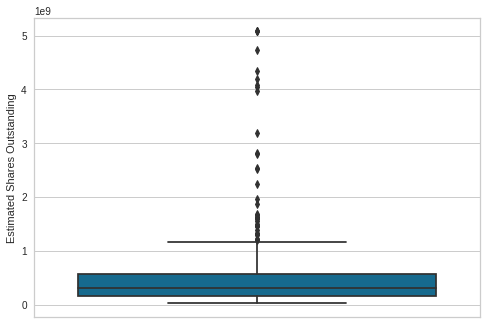

In [ ]:
#Setting the outliers for Estimated Shares Outstanding
upper_limit = 5077033493.0

df['Estimated Shares Outstanding'] = np.where(df['Estimated Shares Outstanding']> upper_limit, upper_limit,df['Estimated Shares Outstanding'])
sns.boxplot( y="Estimated Shares Outstanding", data=df)

In [ ]:
 #Identifying the outliers for P/E Ratio
lower_limit = df['P/E Ratio'].quantile(.01)
upper_limit = df["P/E Ratio"].quantile(0.99)

print(lower_limit)
print(upper_limit)

5.578790919349999
175.92104014100008


In [ ]:
#Identifying the upper outliers for P/E Ratio
df[df['P/E Ratio'] > upper_limit]

Ticker Symbol                 Security             GICS Sector  \
4             ADI     Analog Devices, Inc.  Information Technology   
19           ALXN  Alexion Pharmaceuticals             Health Care   
26           AMZN           Amazon.com Inc  Consumer Discretionary   
226          NFLX             Netflix Inc.  Information Technology   

                      GICS Sub Industry  Current Price  Price Change  \
4                        Semiconductors      55.320000     -1.827858   
19                        Biotechnology     190.750000     22.338380   
26   Internet & Direct Marketing Retail     675.890015     32.268105   
226        Internet Software & Services     114.379997     11.145654   

     Volatility  ROE  Cash Ratio  Net Cash Flow  Net Income  \
4      1.701169   14         272      315120000   696878000   
19     2.022921    2         195       66000000   144000000   
26     1.460386    4          58     1333000000   596000000   
226    2.605949    6          65      695722000   122641000   

     Earnings Per Share  Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
4                  0.31                  2.247994e+09  178.451613   1.059810  
19                 0.68                  2.117647e+08  280.514706 -14.171389  
26                 1.28                  4.656250e+08  528.039074   3.904430  
226                0.29                  4.229000e+08  394.413783  -5.700168

In [ ]:
df[df['P/E Ratio']< lower_limit]

Ticker Symbol                     Security             GICS Sector  \
0             AAL      American Airlines Group             Industrials   
142            GM               General Motors  Consumer Discretionary   
221          NAVI                      Navient              Financials   
301           UAL  United Continental Holdings             Industrials   

            GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0                    Airlines      42.349998      9.999995    1.687151  135   
142  Automobile Manufacturers      34.009998     12.281271    1.344514   24   
221          Consumer Finance      11.450000      1.868327    2.230827   25   
301                  Airlines      57.299999      8.215294    1.747606   82   

     Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0            51     -604000000  7610000000               11.39   
142          33    -3857000000  9687000000                6.11   
221          99      151000000   997000000                2.66   
301          42     1004000000  7340000000               19.52   

     Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
0                    6.681299e+08   3.718174  -8.784219  
142                  1.585434e+09   5.566284  -4.892037  
221                  3.748120e+08   4.304511  -1.880943  
301                  3.760246e+08   2.935451 -23.195292

**I am having trouble deciding a cut off for the outliers from this data. I will visualize to see the approprate cut off for this variable.**

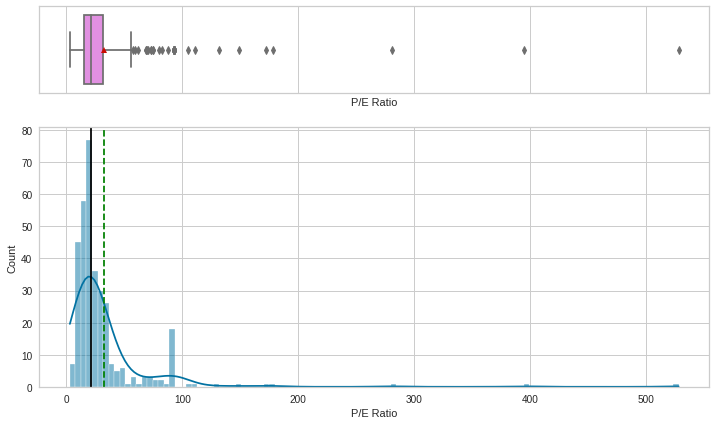

In [ ]:
#Visualization of outliers
histogram_boxplot(df,'P/E Ratio')

**There are 3 outlier points above 200 which are skewing the data. I will set the max number to 200 to correct this.**

<AxesSubplot:ylabel='P/E Ratio'>

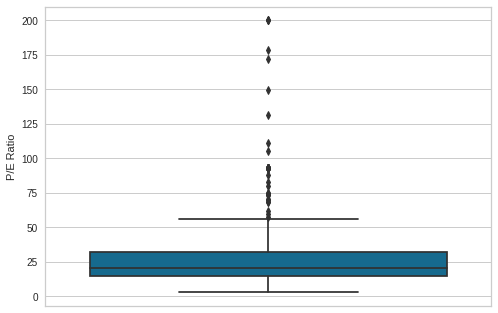

In [ ]:
#Setting the outliers for P/E Ratio
upper_limit = 200

df['P/E Ratio'] = np.where(df['P/E Ratio']> upper_limit, upper_limit,df['P/E Ratio'])
sns.boxplot( y="P/E Ratio", data=df)

**All outliers have been cleaned at this point to the point just above the max or min number.**

In [ ]:
#Scaling the numeric data for uniform analysis
scaler = StandardScaler()
subset = df[numeric_columns].copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## EDA

- It is a good idea to explore the data once again after manipulating it.

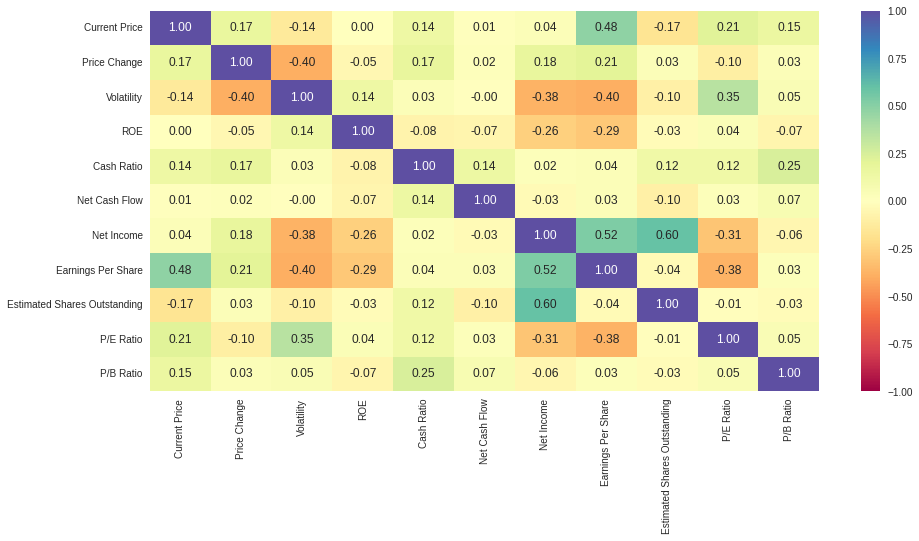

In [ ]:
#Let's look at the heatmap for coorelations in the scaled data set
plt.figure(figsize=(15, 7))
sns.heatmap(
    subset_scaled_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

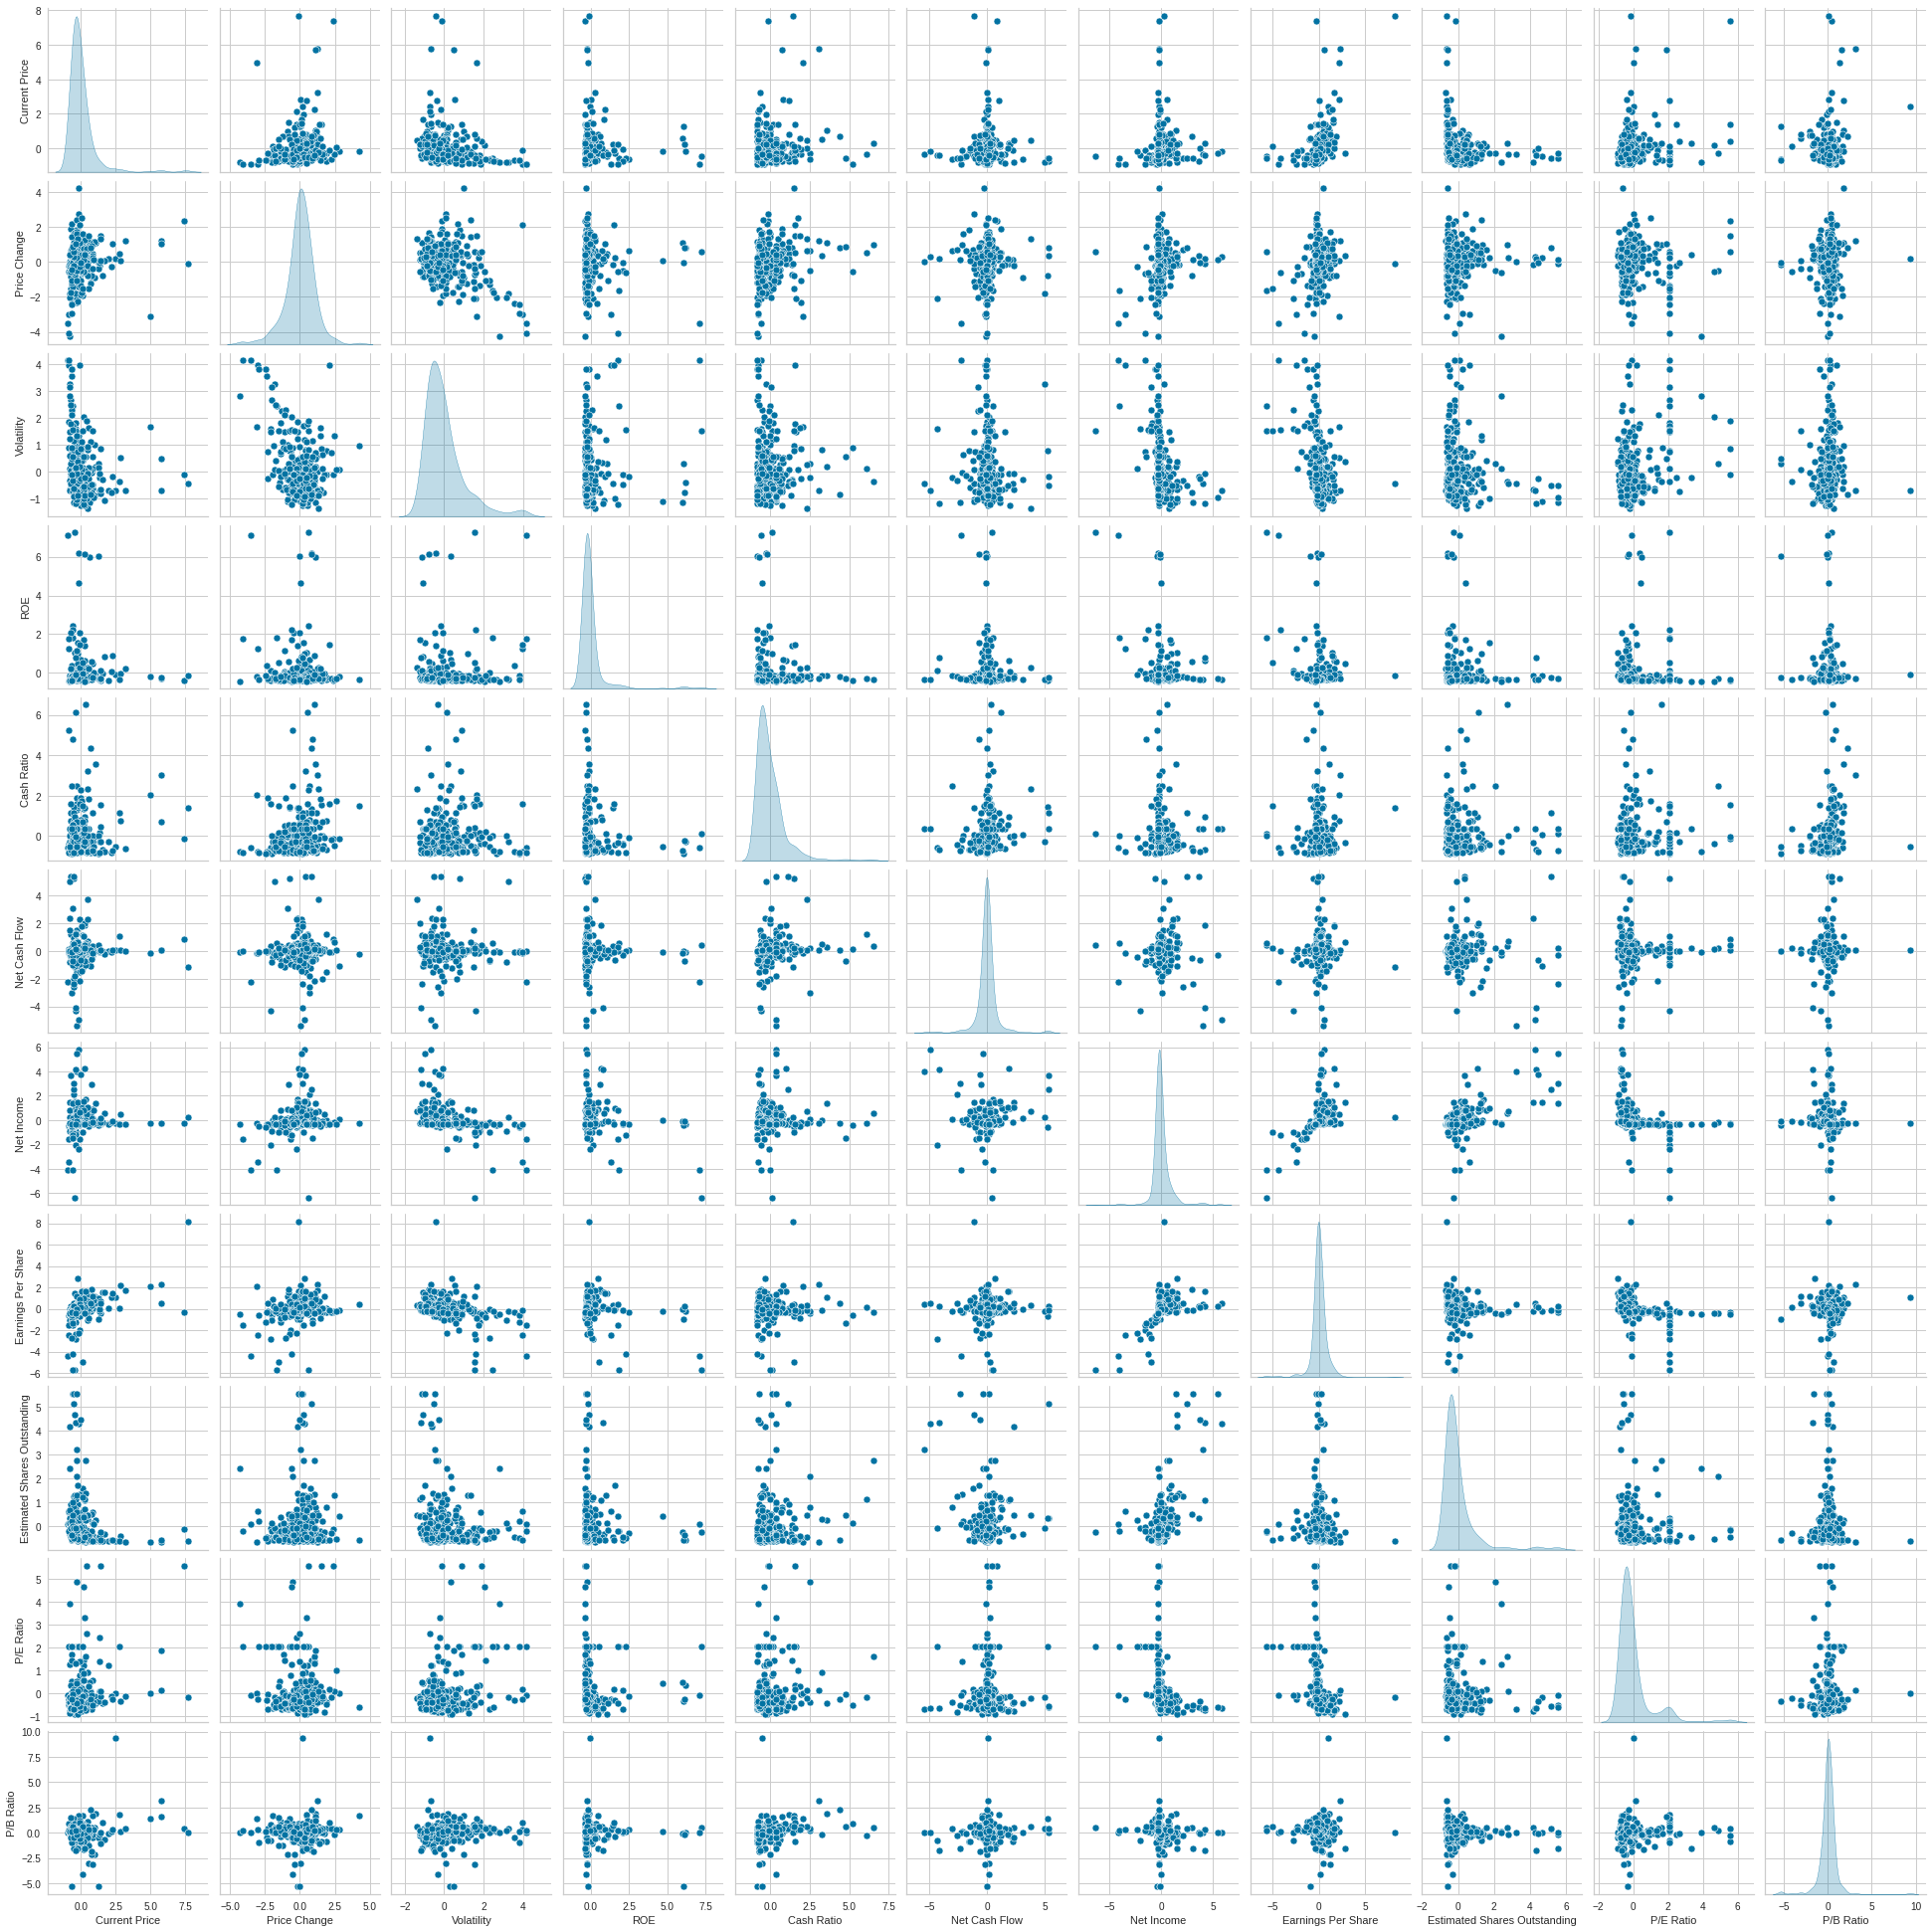

In [ ]:
#Pairplot to look for relationships across the variables using the scaled df
sns.pairplot(data=subset_scaled_df, diag_kind="kde")
plt.show()

**The coorelations seen on the heatmap have stayed consistent from the original dataframe coorelations. This was the goal for outlier treatment and why the max or min number was used rather than mean or any other strategy. The distribution for numberous variables has been normalized with the outlier treatment while still maintaining the skews from the original dataset. This again was the goals so that an accurate analysis of the original data can be obtained.**

## K-means Clustering

Number of Clusters: 1 	Average Distortion: 2.673515172601056
Number of Clusters: 2 	Average Distortion: 2.4929995596910963
Number of Clusters: 3 	Average Distortion: 2.3787163851667397
Number of Clusters: 4 	Average Distortion: 2.2748339641963007
Number of Clusters: 5 	Average Distortion: 2.2065918219430367
Number of Clusters: 6 	Average Distortion: 2.164042223921523
Number of Clusters: 7 	Average Distortion: 2.116025767052163
Number of Clusters: 8 	Average Distortion: 2.0184297922059824
Number of Clusters: 9 	Average Distortion: 1.975349581947771
Number of Clusters: 10 	Average Distortion: 1.9114790918749585
Number of Clusters: 11 	Average Distortion: 1.879234261607656
Number of Clusters: 12 	Average Distortion: 1.841930480807384
Number of Clusters: 13 	Average Distortion: 1.8265193230372214
Number of Clusters: 14 	Average Distortion: 1.786247257402506


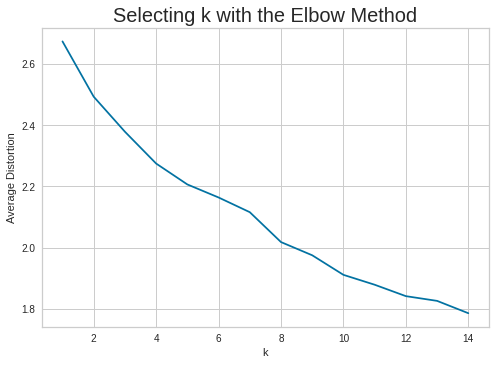

In [ ]:
#Looking at the elbow plot for potential clusters in the scaled data
k_means_df = subset_scaled_df.copy()

clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(subset_scaled_df)
    prediction = model.predict(k_means_df)
    distortion = (
        sum(np.min(cdist(k_means_df, model.cluster_centers_, "euclidean"), axis=1))
        / k_means_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

**There are distinct elbows at 7 and 8.**

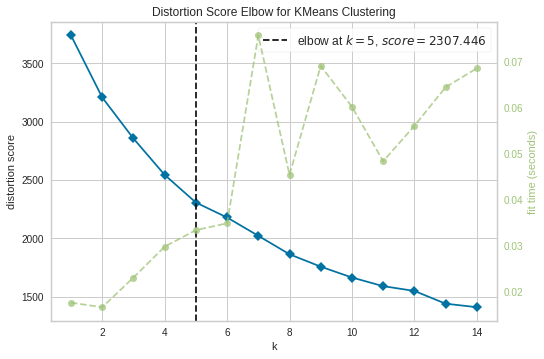

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
#Using the K means visualizer to help find the number of clusters
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(k_means_df)  
visualizer.show()  

**This visualization shows k=5 due to the time of computation and the distortion scores from the scaled data.**

For n_clusters = 2, the silhouette score is 0.42309857983389076)
For n_clusters = 3, the silhouette score is 0.43825359576437534)
For n_clusters = 4, the silhouette score is 0.42858208216772814)
For n_clusters = 5, the silhouette score is 0.4375009757386363)
For n_clusters = 6, the silhouette score is 0.3526960511598915)
For n_clusters = 7, the silhouette score is 0.38438111904416933)
For n_clusters = 8, the silhouette score is 0.10424313850336703)
For n_clusters = 9, the silhouette score is 0.11599334320006077)
For n_clusters = 10, the silhouette score is 0.1288100587619765)
For n_clusters = 11, the silhouette score is 0.12590624154940047)
For n_clusters = 12, the silhouette score is 0.11465687534998319)
For n_clusters = 13, the silhouette score is 0.14257393370644836)
For n_clusters = 14, the silhouette score is 0.18187540005363162)


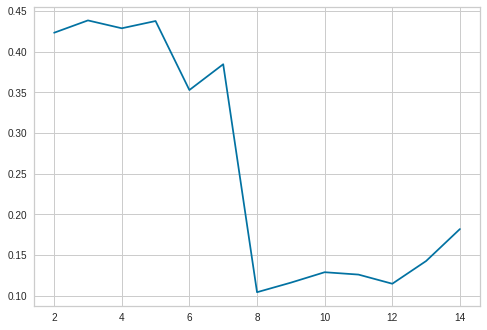

In [ ]:
#Running Silhouette Scores to find the correct number for k
sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((subset_scaled_df))
    score = silhouette_score(k_means_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

**There is a drop at 5 but the data point at 7 increases again before dropping precipitously at 8. The best silhouette score of 1.0 is with 8 clusters.**

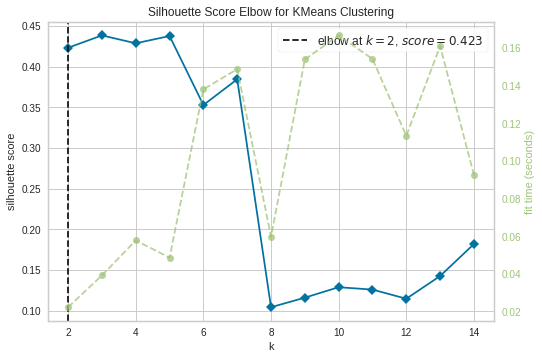

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
#Using visualizer to see the silhouetter scores
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

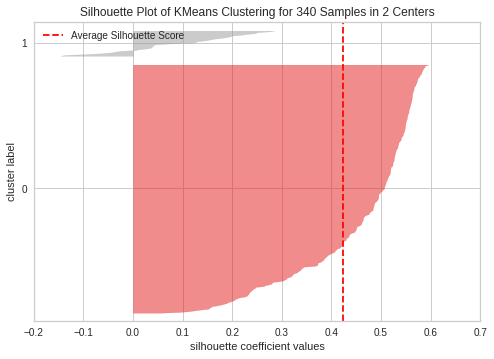

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
#k=2
visualizer = SilhouetteVisualizer(KMeans(2, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

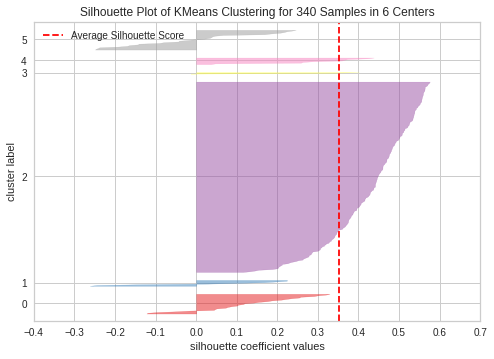

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
# k=6
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))  
visualizer.fit(k_means_df)
visualizer.show()

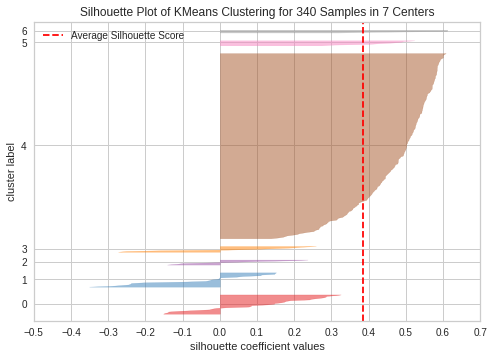

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 7 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
# k=7
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))  
visualizer.fit(k_means_df)
visualizer.show()

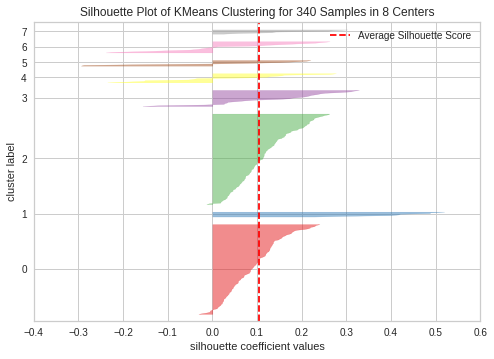

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
# k=8
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))  
visualizer.fit(k_means_df)
visualizer.show()

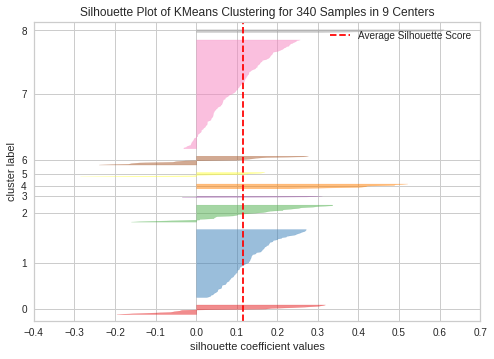

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 9 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
# k=9
visualizer = SilhouetteVisualizer(KMeans(9, random_state=1))
visualizer.fit(k_means_df)
visualizer.show()

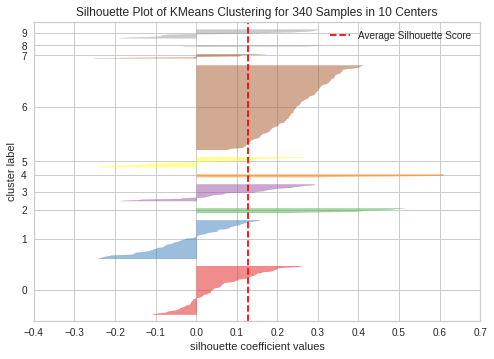

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
# k=10
visualizer = SilhouetteVisualizer(KMeans(10,random_state=1))  
visualizer.fit(k_means_df)
visualizer.show()

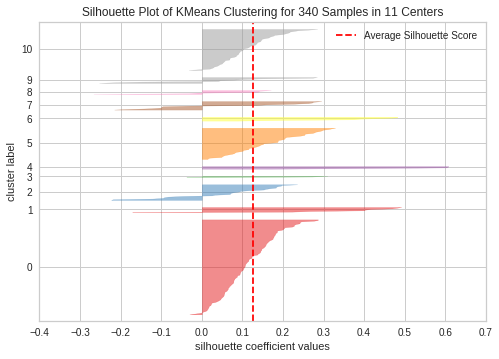

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 340 Samples in 11 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# finding optimal no. of clusters with silhouette coefficients
# k=11
visualizer = SilhouetteVisualizer(KMeans(11, random_state=1)) 
visualizer.fit(k_means_df)
visualizer.show()

**8 Clusters provides an average sihouette score of 0.1 and has the most uniform shape with the fewest negative impact.**

In [ ]:
# Creating final K-means model with 8 clusters
kmeans = KMeans(n_clusters=8, random_state=1) 
kmeans.fit(k_means_df)

KMeans(random_state=1)

In [ ]:
# creating a copy of the original data
df1 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["KM_segments"] = kmeans.labels_
df1["KM_segments"] = kmeans.labels_

# Cluster Profiling

In [ ]:
#grouping clusters off of KM Segments column
km_cluster_profile = df1.groupby("KM_segments").mean()

In [ ]:
#Looking at count in each cluster

km_cluster_profile["count_in_each_segment"] = (
    df1.groupby('KM_segments')["Security"].count().values)

km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

In [ ]:
## Complete the code to print the companies in each cluster
for cl in df1['KM_segments'].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df1[df1['KM_segments'] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Albemarle Corp'
 'Allstate Corp' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'AvalonBay Communities, Inc.'
 'American Water Works Company Inc' 'Bard (C.R.) Inc.' 'Ball Corp'
 'Boston Properties' 'Chubb Limited' 'CBRE Group'
 'Crown Castle International Corp.' 'Carnival Corp.' 'Church & Dwight'
 'CIGNA Corp.' 'Cincinnati Financial' 'CME Group Inc.' 'CMS Energy'
 'CenturyLink Inc' 'CVS Health' 'Dominion Resources' 'Delta Air Lines'
 'Du Pont (E.I.)' 'Quest Diagnostics' 'Danaher Corp.'
 'The Walt Disney Company' 'Discovery Communications-A'
 'Discovery Communications-C' 'Delphi Automotive' 'Digital Realty Trust'
 'Dun & Bradstreet' 'Dover Corp.' 'Dr Pepper Snapple Group' 'Duke Energy'
 'Ecolab Inc.' 'Consolidated Edison' 'Equif

**Clusters 1 and 3 have the most companies. The least amount of companies in a cluster is 7.**

In [ ]:
df1.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary         18
             Consumer Staples               11
             Financials                     15
             Health Care                    10
             Industrials                    25
             Information Technology          3
             Materials                       9
             Real Estate                    17
             Telecommunications Services     2
             Utilities                      20
1            Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     1
             Telecommunications Services     2
2            Consumer Discretionary         14
             Consumer Staples                2
             Energy                          5
             Financials                     27
             Health Care                    16
             Indust

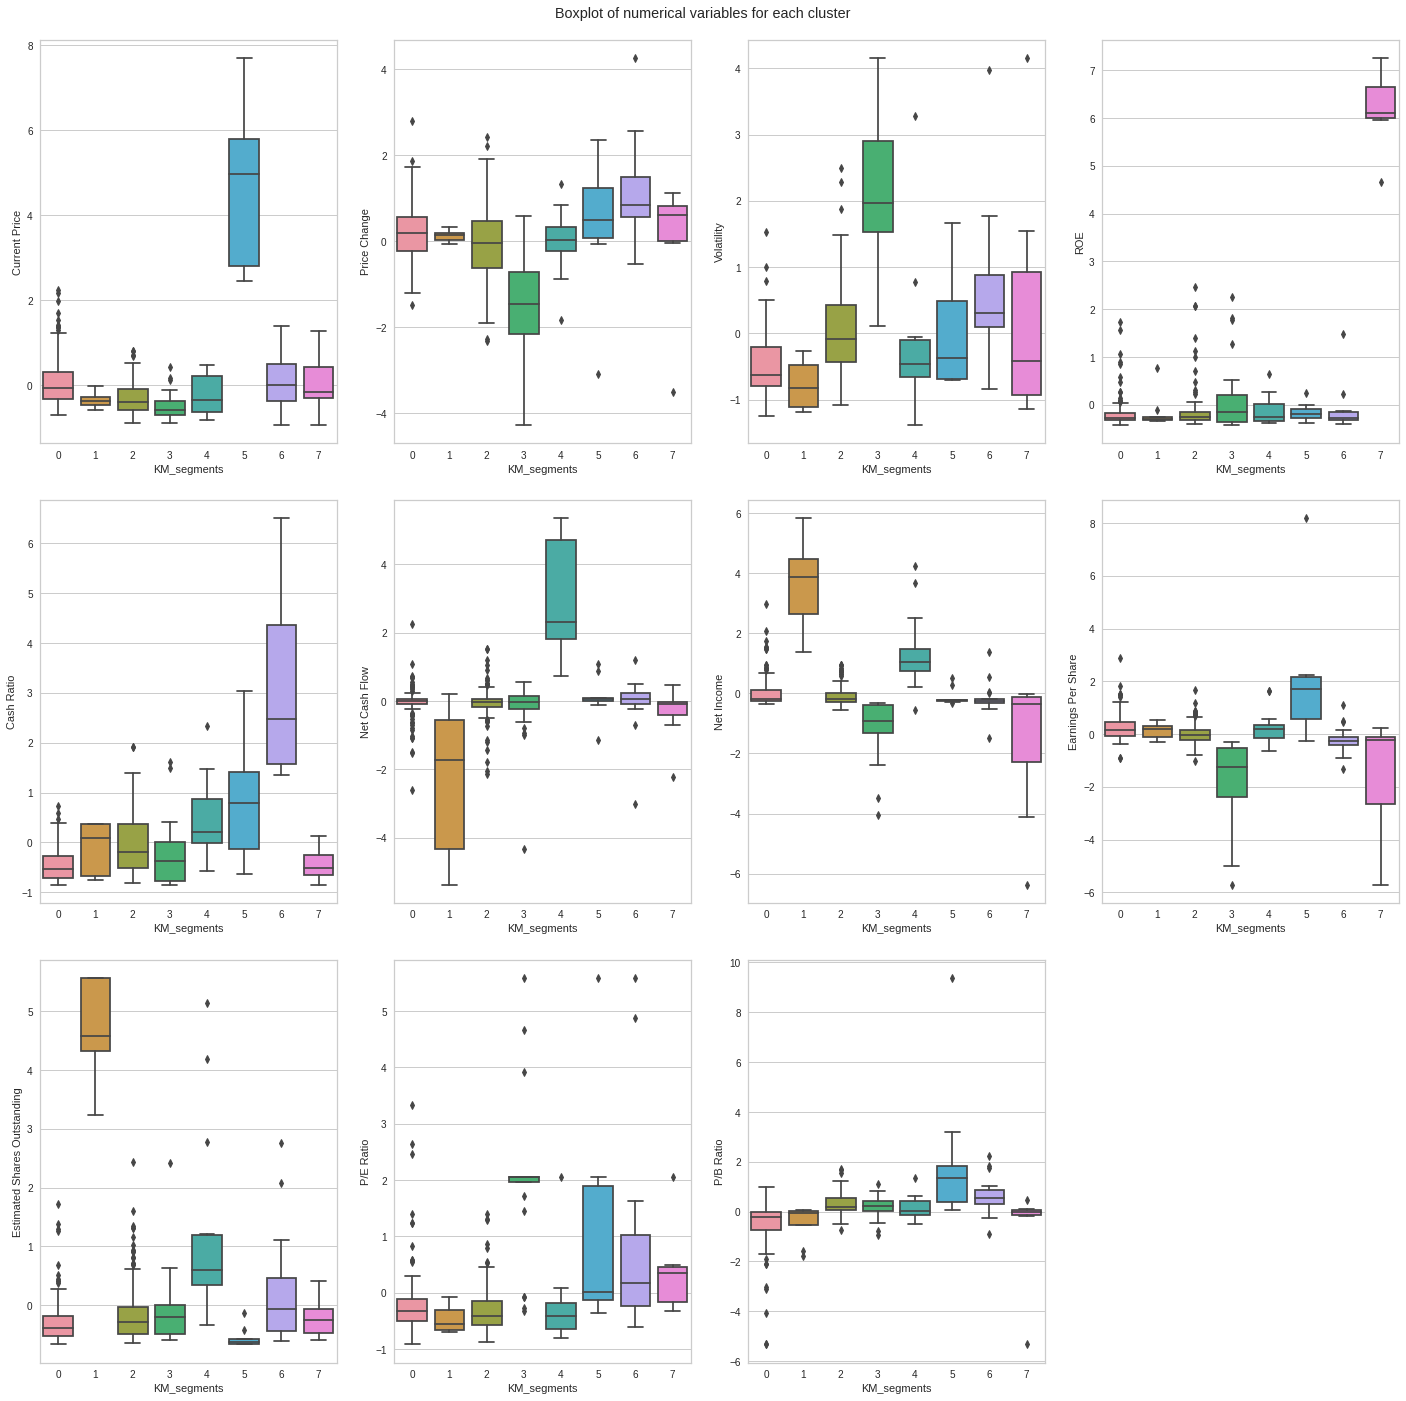

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=k_means_df, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

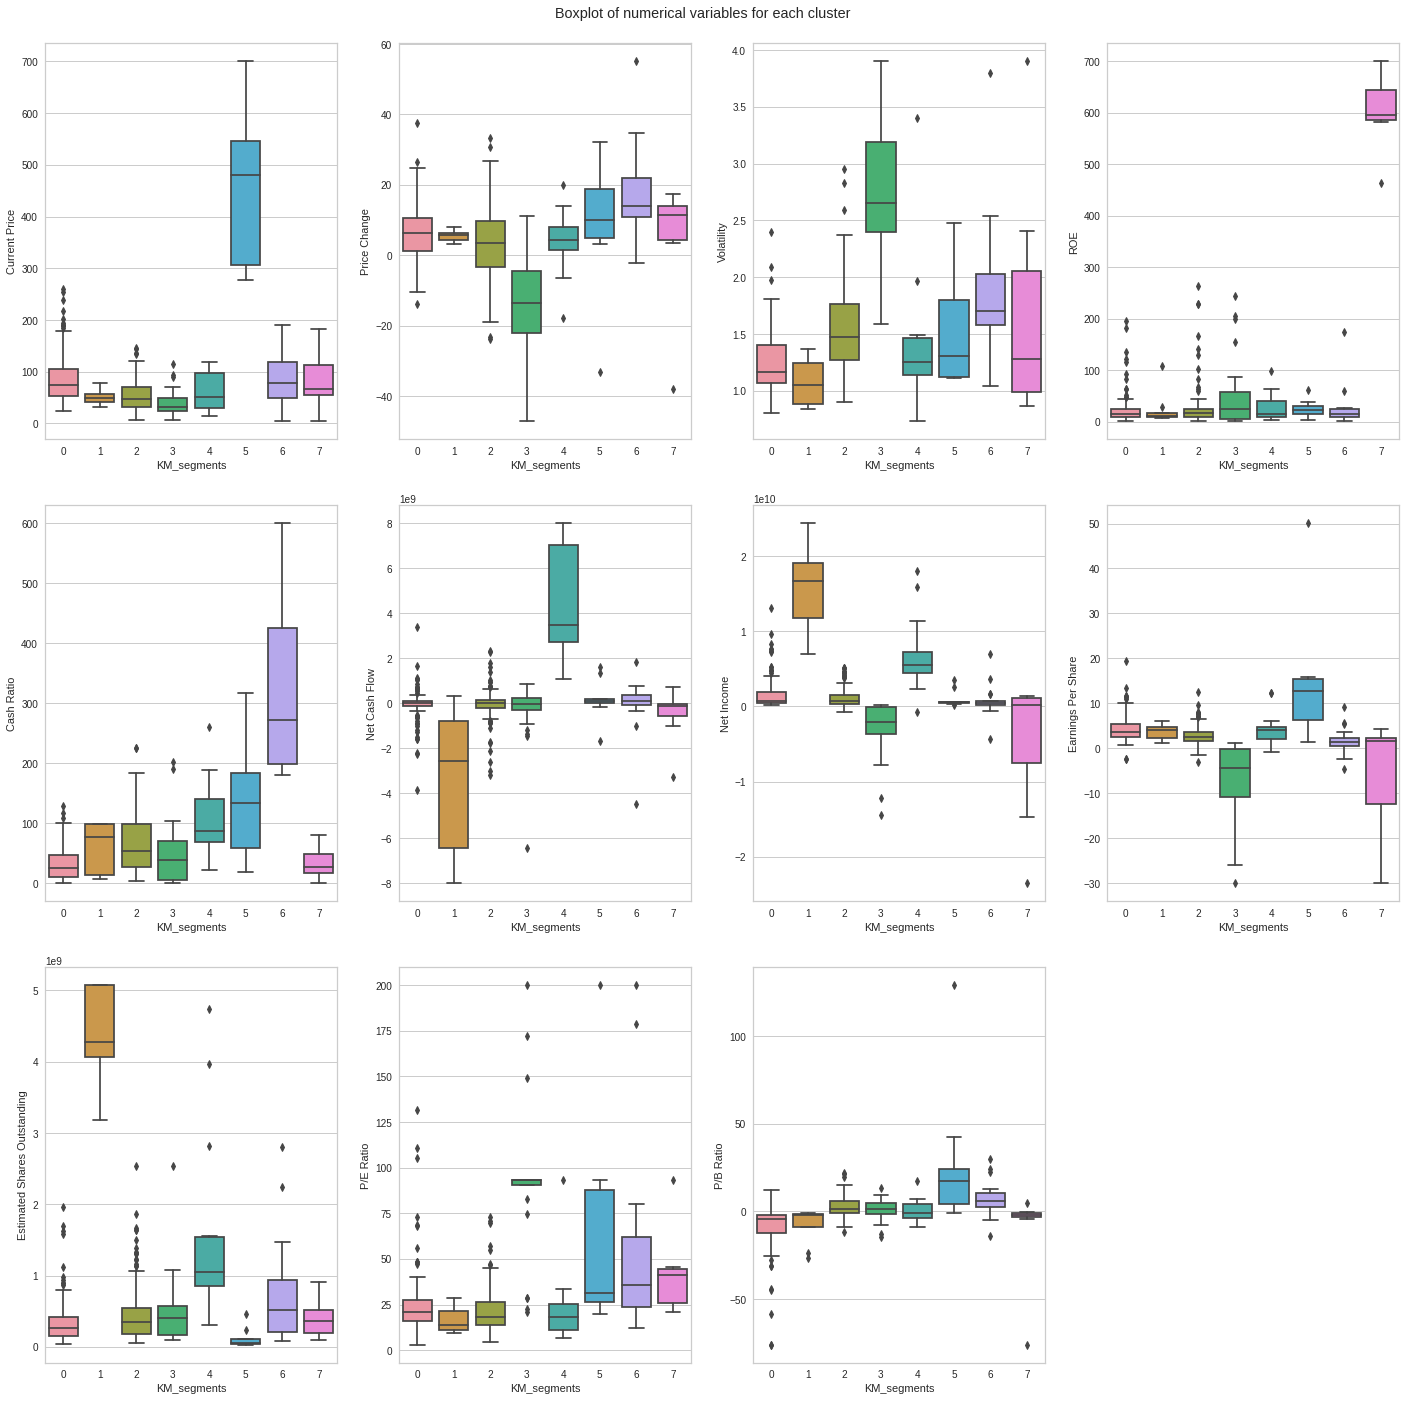

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df1, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

## Hierarchical Clustering

### Computing Cophenetic Correlation

In [ ]:
#Making another copy of df before HC 
hc_df = subset_scaled_df.copy()

In [ ]:
#distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]


#linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]


high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
            
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print('*'*100)
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9006568075562289.
Cophenetic correlation for Euclidean distance and complete linkage is 0.47731362832360924.
Cophenetic correlation for Euclidean distance and average linkage is 0.926443005307398.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8472154707544187.
Cophenetic correlation for Chebyshev distance and single linkage is 0.8810008348827447.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.5243755144641751.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9086720907326007.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8606058318605389.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9029274770817884.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7970859377324447.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9157184036118532.
Cophenetic co

**The highest cophenetic correlation is found with Euclidean distance and average linkage. There are a few other combinations that provide the cophenetic correlation in the 90% range but this combo is the highest. Let's see what all of the Euclidean distance measure look like.**

In [ ]:
#Exploring all linkage for Euclidean distance measures
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9006568075562289.
Cophenetic correlation for complete linkage is 0.47731362832360924.
Cophenetic correlation for average linkage is 0.926443005307398.
Cophenetic correlation for centroid linkage is 0.9343964677294215.
Cophenetic correlation for ward linkage is 0.7157496901681369.
Cophenetic correlation for weighted linkage is 0.8472154707544187.


**The Centroid linkage is the highest cophenetic coorelation followed by average and single.**

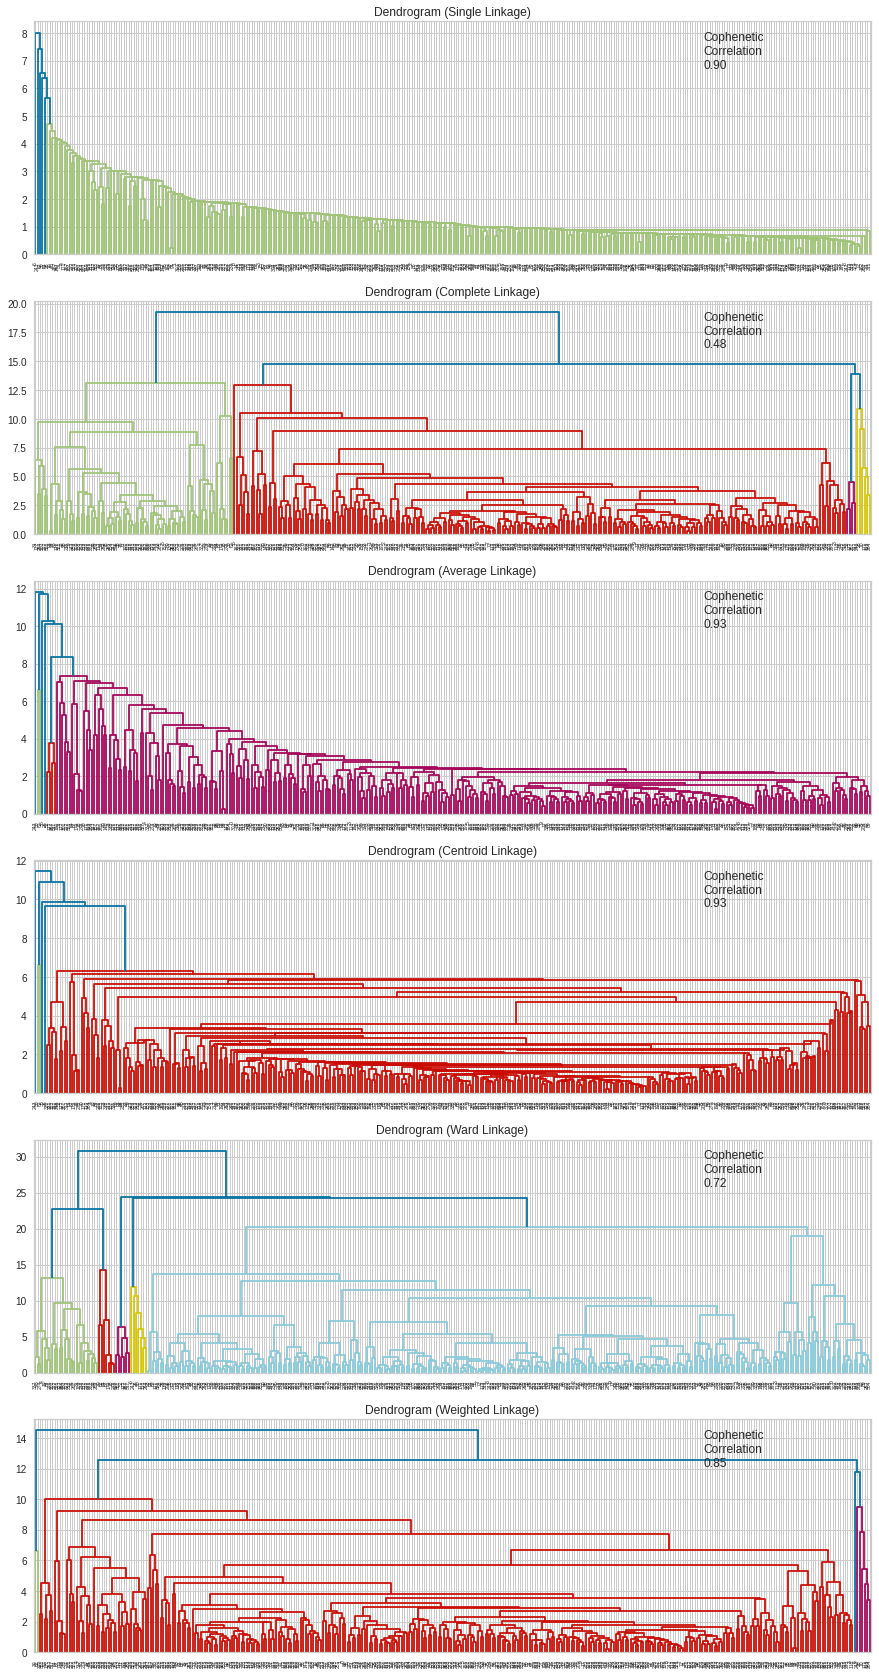

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hc_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hc_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Average and Centroid have the highest cophenetic coorelations at 93%.  We will use Average linkage 7 clusters appearing to contain the majority of the data.**

**Creating Hierarhical Cluster**

In [ ]:
#setting model with 7 clusters, euclidean method with average linkage
HCmodel = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='average')
HCmodel.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=7)

In [ ]:
# creating copy of the original data
df2 = df.copy()


In [ ]:
# adding hierarchial cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel.labels_
df2["HC_segments"] = HCmodel.labels_

In [ ]:
#Grouping clusters by their hierarchial cluster labels in the original dataset
hc_cluster_profile = df2.groupby("HC_segments").mean()

In [ ]:
#Adding the number of businesses to each cluster
hc_cluster_profile["count_in_each_segment"] = (
    df2.groupby("HC_segments")["Security"].count().values)

In [ ]:
#Let's see the max variable for each cluster
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)


**The 0 cluster is heavily weighted with the overwhelming majority of data points located there. Clusters 1, 3 and 4 only have one data point in them.**

In [ ]:
##Let's see which companies are in each cluster
for cl in df2["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df2[df2["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 0, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Alexion Pharmaceuticals' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Amgen Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'Baker Hughes Inc' 'BIOGEN IDEC Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers

**Again, Cluster 0 is heavily loaded compared to all other clusters from the hierachial clustering method. This also shows that the huge outlier Priceline from the original dataset has been placed in a cluster alone. This suggests that the HC clustering method was affected by the outliers in the original dataset.**

In [ ]:
df2.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary         38
             Consumer Staples               19
             Energy                         23
             Financials                     47
             Health Care                    40
             Industrials                    53
             Information Technology         32
             Materials                      19
             Real Estate                    27
             Telecommunications Services     3
             Utilities                      24
1            Consumer Discretionary          1
2            Energy                          5
             Materials                       1
3            Information Technology          1
4            Consumer Discretionary          1
5            Financials                      2
             Telecommunications Services     2
6            Energy                          2
Name: Security, dtype: int64

**The HC segments have far less variation than the KM segments with more clusters.**


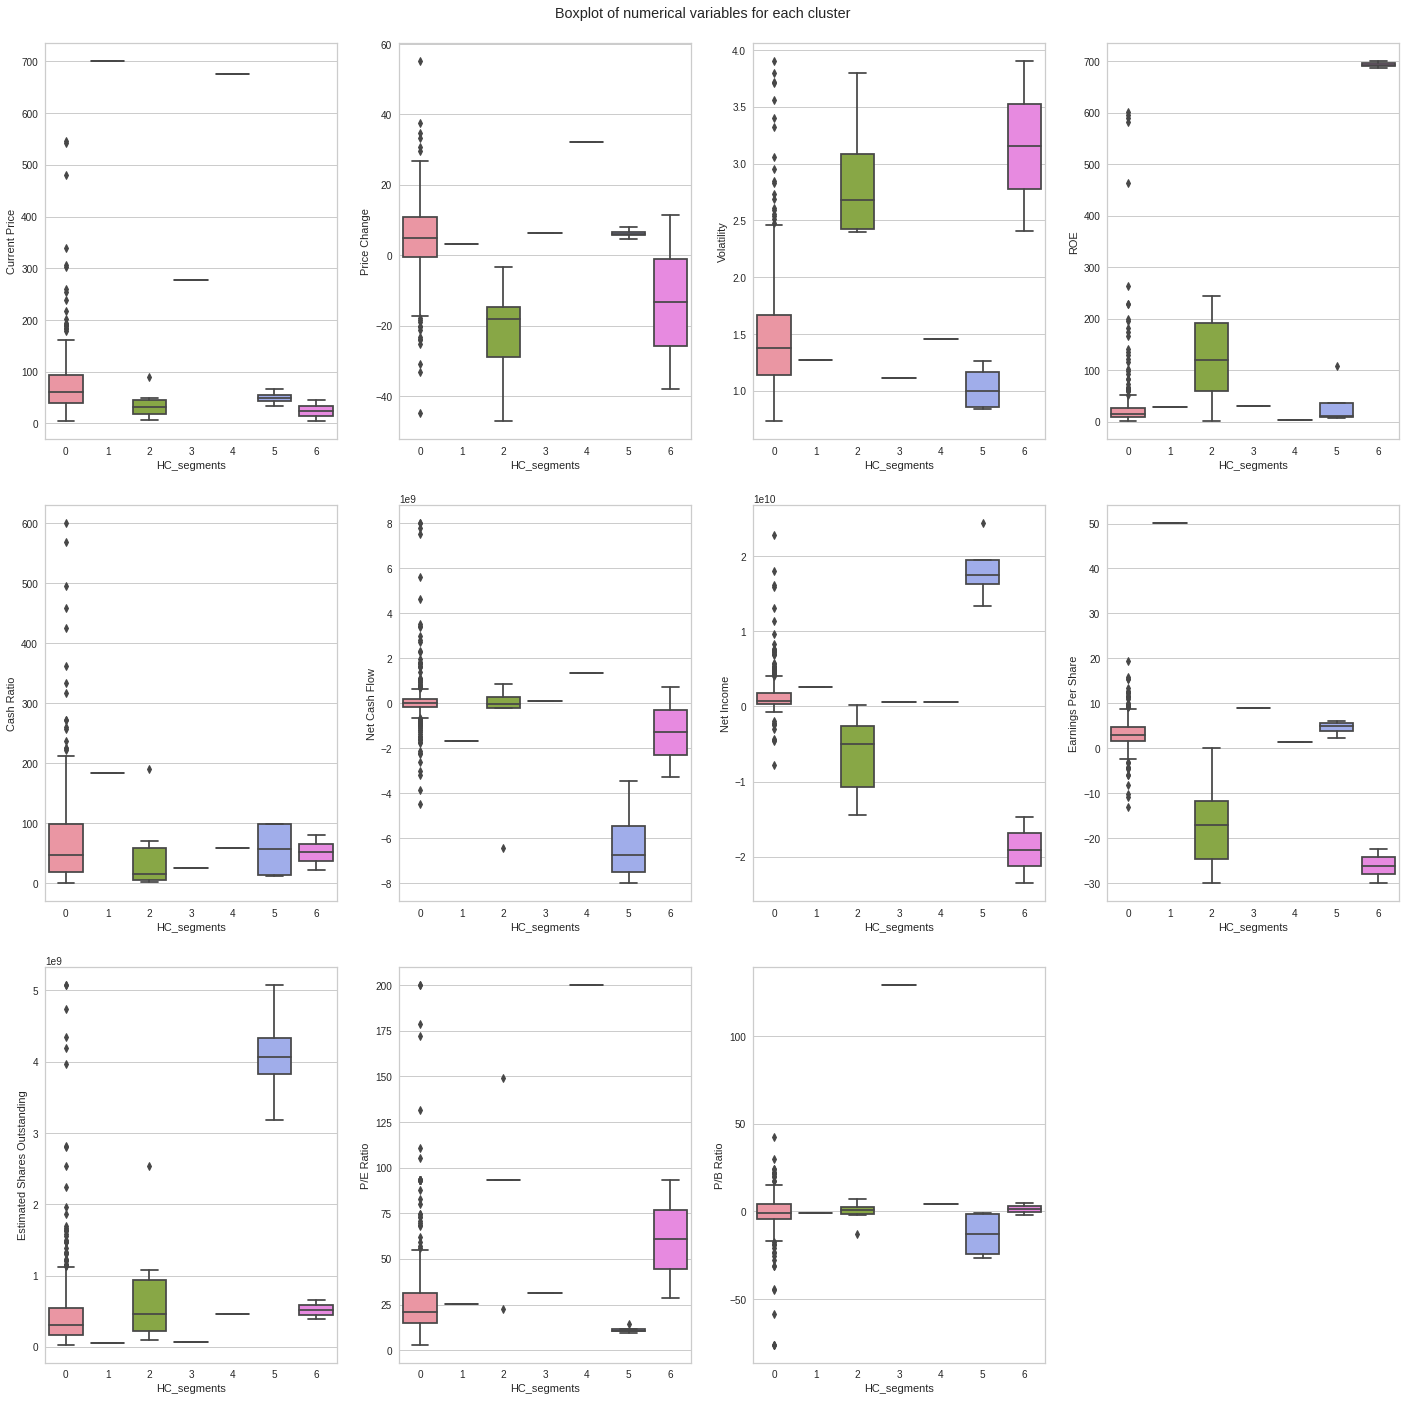

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df2, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

**Since the HC using Average linkage was so affected by the outlier data, let's try it with a Ward linkage since that approach handles noisy data more efficiently. We will use 7 clusters for this model as well.**

In [ ]:
#setting model with 7 clusters, euclidean method with ward linkage
HCmodel1 = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='ward')
HCmodel1.fit(hc_df)

AgglomerativeClustering(affinity='euclidean', n_clusters=7)

In [ ]:
# creating copy of the original data
df3 = df.copy()

In [ ]:
# adding hierarchial cluster labels to the original and scaled dataframes
hc_df["HC_segments"] = HCmodel1.labels_
df3["HC_segments"] = HCmodel1.labels_

In [ ]:
#Grouping clusters by their hierarchial cluster labels in the original dataset
hc_cluster_profile = df3.groupby("HC_segments").mean()

In [ ]:
#Adding the number of businesses to each cluster
hc_cluster_profile["count_in_each_segment"] = (
    df3.groupby("HC_segments")["Security"].count().values)

In [ ]:
#Let's see the max variable for each cluster
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

**Using Ward linkage does create more diversity across the clusters but there is still a very heavy cluster in number 5 with 248 companies in that group. The least amount is found in cluster 4 with 6 companies. This is much better diversity compared to the average linkage where there were many clusters with only 1 company.**

In [ ]:
##Let's see which companies are in each cluster
for cl in df3["HC_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df3[df3["HC_segments"] == cl]["Security"].unique())
    print()

In cluster 2, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Archer-Daniels-Midland Co' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Applied Materials Inc' 'AMETEK Inc'
 'Affiliated Managers Group Inc' 'Ameriprise Financial'
 'American Tower Corp A' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'BIOGEN IDEC Inc.'
 'The Bank of New York Mellon Corp.' 'Ball Corp' 'Bristol-Myers Squibb'
 'Boston Scientific' 'BorgWarner' 'Boston Properties' 'Caterpillar Inc.'
 'Chubb Limited' 'CBRE Group' 'Crown Castle International Corp.'
 'Carniv

In [ ]:
#Looking at the number of securities by sector per cluster
df3.groupby(["HC_segments", "GICS Sector"])['Security'].count()

HC_segments  GICS Sector                
0            Consumer Discretionary          1
             Consumer Staples                2
             Energy                          2
             Financials                      1
             Industrials                     1
1            Energy                         21
             Health Care                     3
             Industrials                     1
             Information Technology          3
             Materials                       3
             Real Estate                     1
2            Consumer Discretionary         32
             Consumer Staples               15
             Energy                          5
             Financials                     44
             Health Care                    28
             Industrials                    51
             Information Technology         23
             Materials                      16
             Real Estate                    24
             Teleco

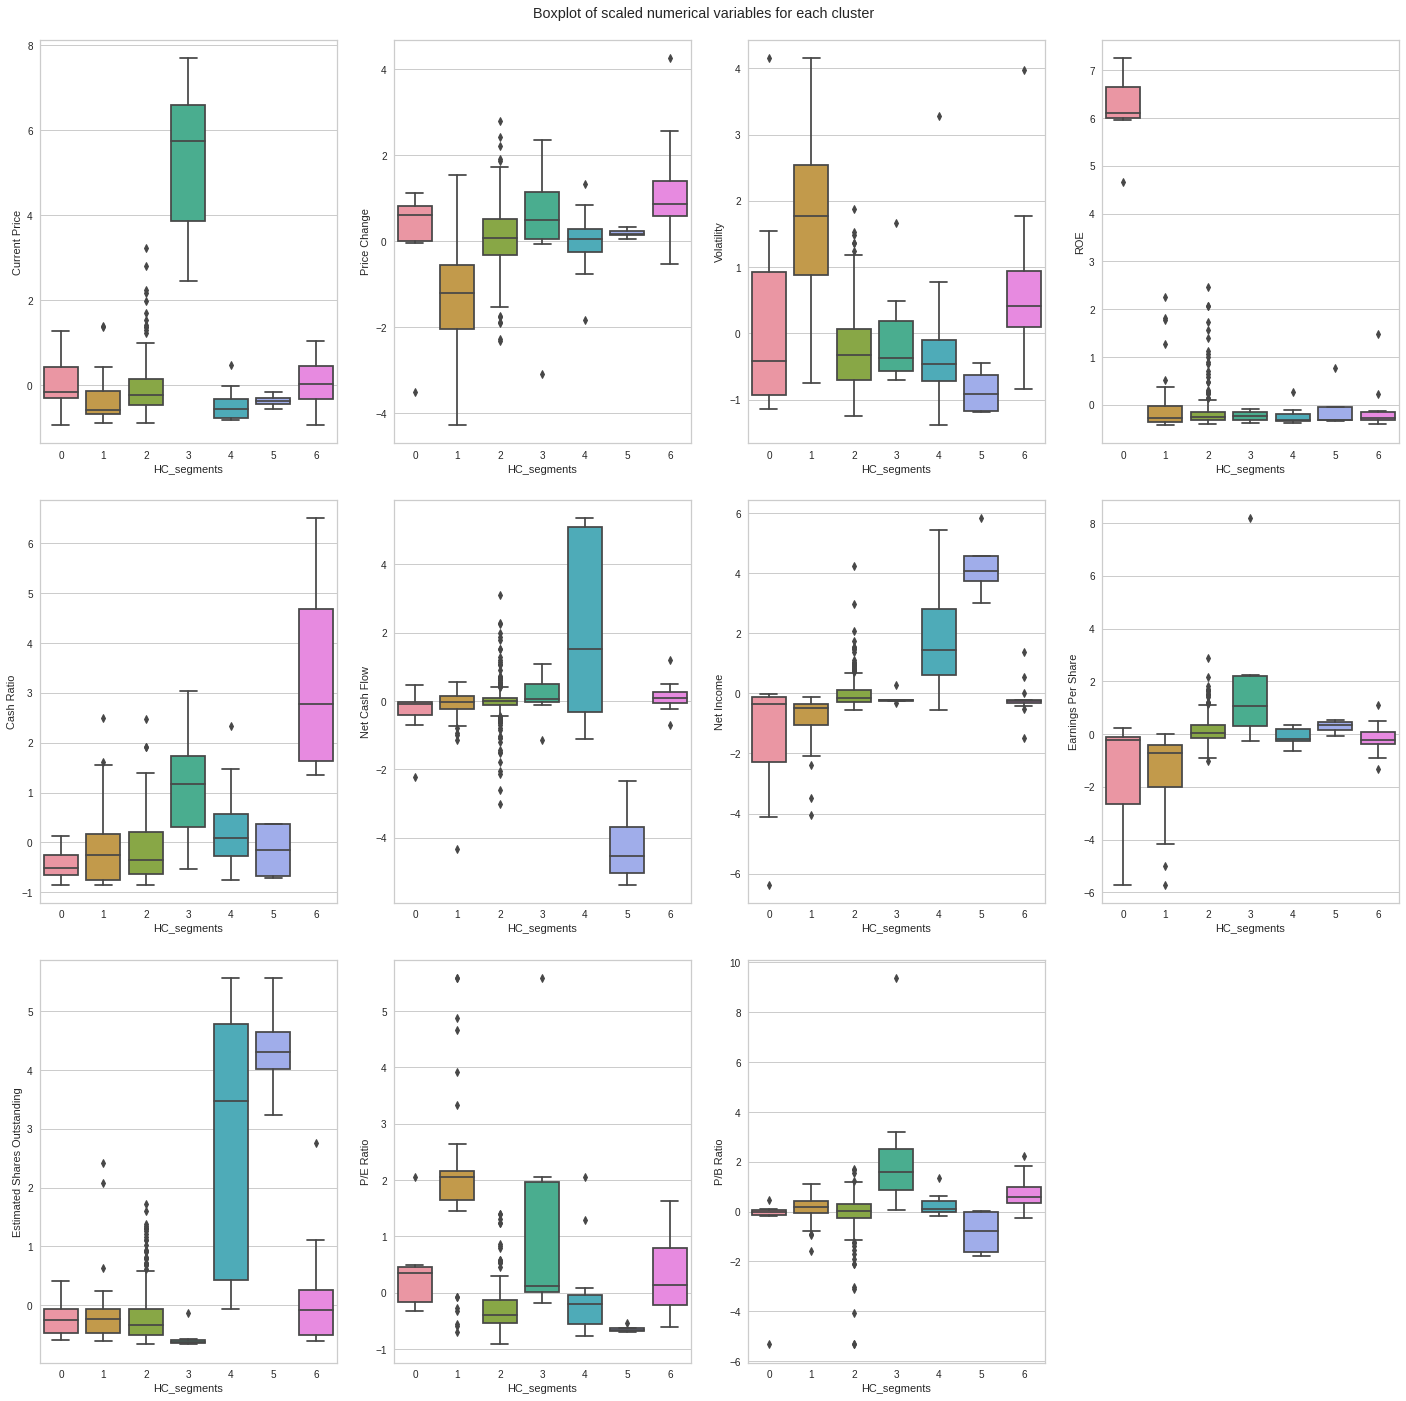

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of scaled numerical variables for each cluster")

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=hc_df, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

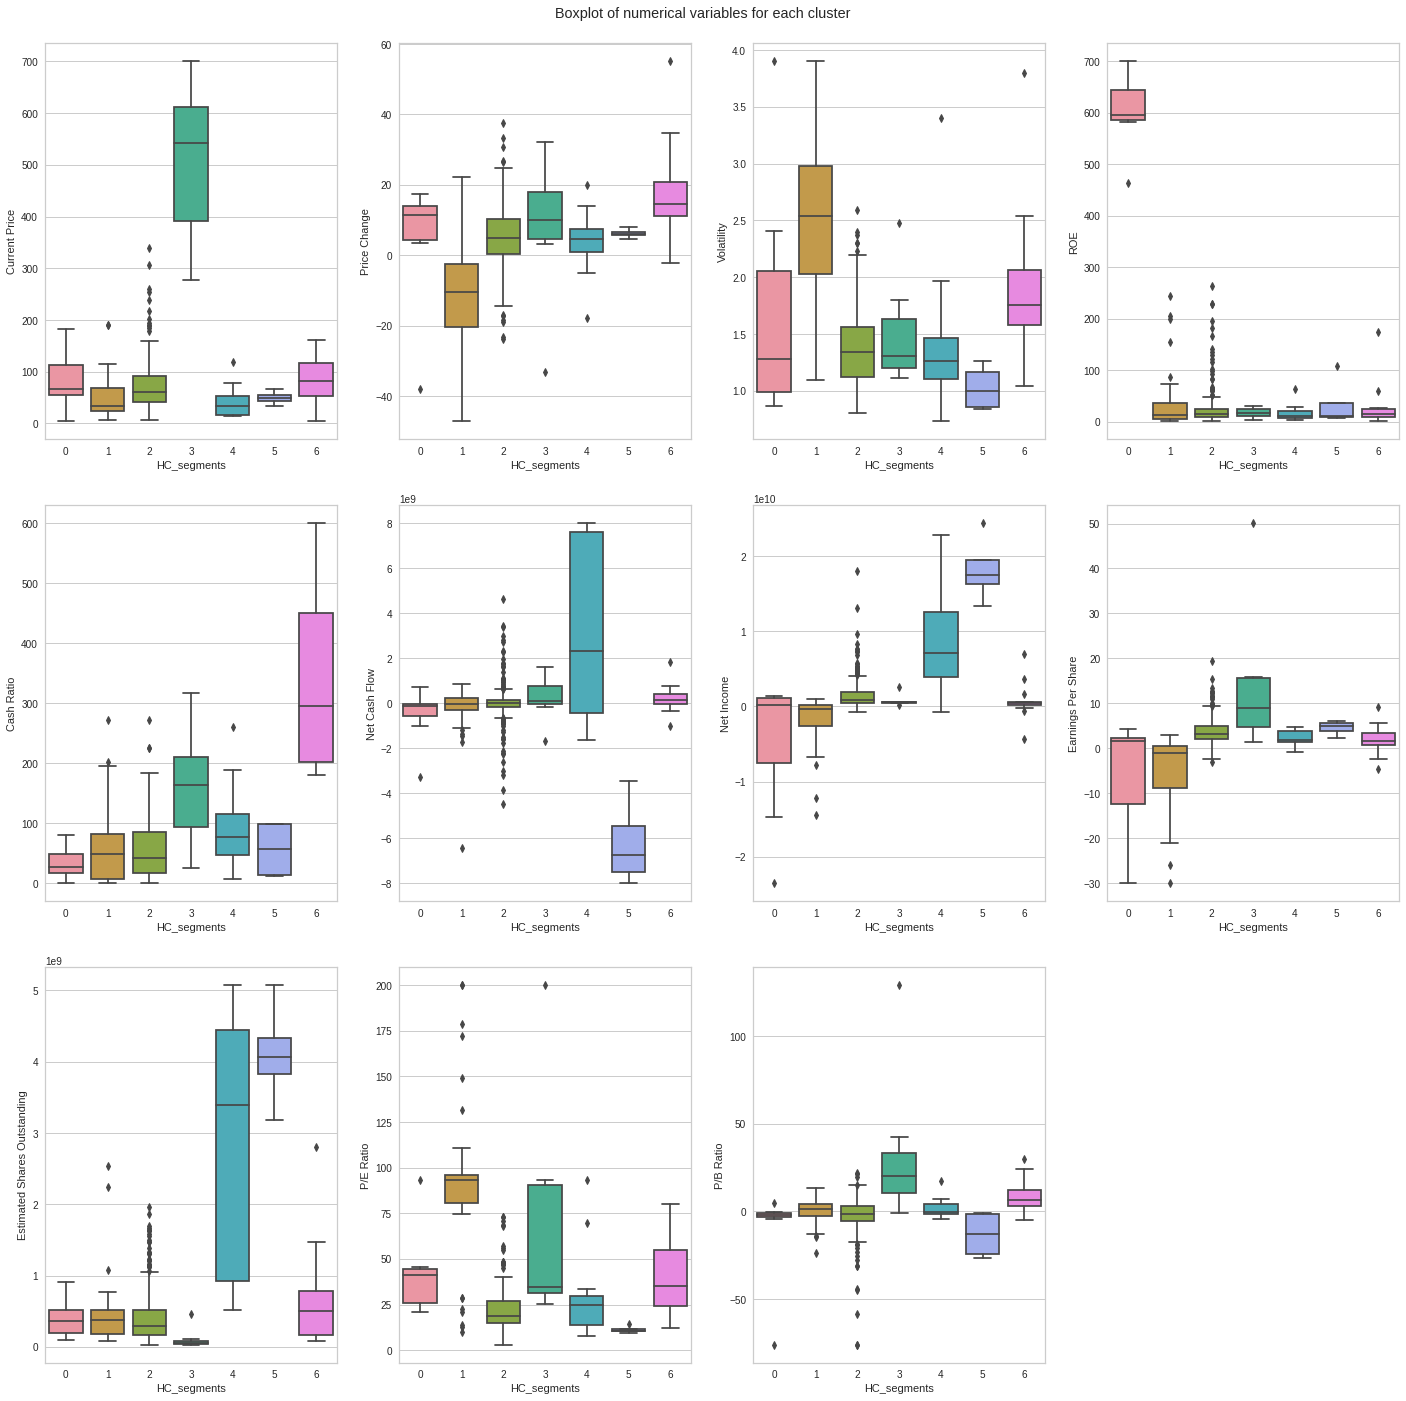

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(numeric_columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df3, x="HC_segments", y=variable)

plt.tight_layout(pad=2.0)

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution? **There is very little difference in the time necessary for KMeans vs Hierarchiacal Clustering. Both models ran quickly.**
- Which clustering technique gave you more distinct clusters, or are they the same? **KMeans broke the companies into more distinct Clusters with more diversity across the Clusters. HC using average linkage was not able to filter out the noise from the extreme outliers in the data set and ward linkage only did a slightly better job. However, neither HC model provided as diverse of Clusters as KM.**
- How many observations are there in the similar clusters of both algorithms? **Interestingly, there are only a couple of remotely similar Clusters across the algorithms. Both HC algorithms showed poorly distributed Clusters with heavy distribution to only a few Clusters. The Kmeans algorithm was able to provide much more diversity amoungst the Clusters. It also seemed to handle the noise of the outliers easier than the HC methods.**
- How many clusters are obtained as the appropriate number of clusters from both algorithms? **The K Means called for 8 Clusters and the HC called for 7 Clusters as their appropriate number. However, with the Ward linkage, there were no distinct levels of ideal Clusters found in the Dendogram as easily as they were in the Average linkage.**

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques. **When looking at the distributions across Clusters in the 3 algorithms ran, you see a greater diversity of business sectors with more uniformity in the number of businesses represented when looking that the K means Clusters vs HC Clusters. With the Averge linkage, you have mulitple Clusters with only one sector and business represented. When I ran a Ward linkage to see if it would better fit the outliers, it did create a slight bit more diveristy but only one true Cluster with diverse data, the other Clusters were very weak in content. The K means algorithm has provided the best tool to provide insight and recommendations based off of the provided data set.**

## Actionable Insights and Recommendations


**In analyzing the KMeans algorthm results, the following impressions can be made- Cluster 2 has the most individual securities with 131 followed by Cluster 0 at 130, Cluster 3 at 24, Cluster 6 at 17 and Cluster 4 at 14. The other 3 Clusters, 5, 1, and 7 have 9, 8 and 7 securities respectively. Interestingly, neither of the most populated clusters have the max number for any of the other variables. This could show a true diversity across the businesses within the cluster. The clusters with less businesses in them had more max numbers such as cluster 5 with the highest current price, earnings per share and P/B ratio with only 9 businesses. These could be considered higher risk/reward investments because they are outliers in the data set with a more condensed portfolio of diversement. Let's take a deeper look into the make up of the most populated Clusters as well as those that have distinct information to provide to potential investors.**


---


**Insight from individual Clusters to provide guidance on investment strategies:**


*   **Cluster 2-** With a total of 131 stocks there are no outstanding variables that stand out for this Cluster. Most all of the variables appear to be at the average or mean of the variable in the dataset with outliers that appear to branch in a postive manner except for net cash flow, which does branch into the negative. This Cluster cuts across all sectors of investment in a robust manner and shows stability across all variables. **It would represent a diverse, relatively consistent and low risk investment strategy with slight volitility that would potentially yield slightly higher returns over time.**
*   **Cluster 0-** With a total of 130 stocks, this Cluster mimics Cluster 2 in its diverse business segments. However, this Cluster has a higher average current price and higher number of outliers in the positive range. It also has a much lower average volitility which suggests that these stocks maintain their higher value with less movement. There is a slight benefit in the outliers to the ROE for Cluster 2 but less than 100 and only with a few outliers. The outliers in this Cluster for the P/B ratio are all in the negative with a slightly lower average compared to Cluster 2 which could indicate that there are mulitple stocks in this cluster that are undervalued. **Overall, the stocks in this Cluster could be considered very stable, undervalued, consistent and low risk with a similar ROE as the more volitile Cluster 2.**

*   **Cluster 3-** This Cluster only has 24 companies and has the highest rate of volatility of any Cluster with around the same ROE as Cluster 2. This Cluster also has a lowest average net income and lowest average earnings per share. **This Cluster does not seem to be a good investment strategy and could be considered high risk with low reward.**
*   **Cluster 5-** This Cluster only has 9 stocks but has the highest current price with a relatively average volatility. These stocks have an average ROE and an above average cash ratio. It has the highest rate of earnings per share, the highest P/B ratio indicating that it is undervalued and the lowest number of outstanding shares available. This Cluster would represent a very good investment strategy due to the high rate of return coupled with an average volatitily factor. Also, the limited number of shares still available will make it more valuable over time due to scarcity. **This Cluster of 9 stocks could be considered a good strategy for those investors that can buy in at a higher price knowing that they will be buying some of the last remaining shares. This Cluster could be considered an average risk with high reward investment.**



In [ ]:
%%shell
jupyter nbconvert --to html /content/Apligian_Final_Project_USL_Project_LearnerNotebook_FullCode+_282_29.ipynb

[NbConvertApp] Converting notebook /content/Apligian_Final_Project_USL_Project_LearnerNotebook_FullCode+_282_29.ipynb to html
[NbConvertApp] Writing 5226437 bytes to /content/Apligian_Final_Project_USL_Project_LearnerNotebook_FullCode+_282_29.html
